# COVID-19 Messaging in Canada
## Part 2: Exploratory Data Analysis

In [1]:
#import sys
#print(sys.path)

In [2]:
#!pip install afinn

In [3]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import spacy
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from afinn import Afinn
from wordcloud import WordCloud, ImageColorGenerator

Reading in data files resulting from last notebook:

In [4]:
#import data
df_reports = pd.read_csv('../Data/reports_clean.csv')
df_cases = pd.read_csv('../Data/cases_clean.csv')
df_vaccinations = pd.read_csv('../Data/vaccinations_clean.csv')

In [5]:
df_reports.head()

Unnamed: 0 Organization Province        Date  \
0           0     Province       AB  2020-03-05   
1           1     Province       AB  2020-03-05   
2           2     Province       AB  2020-03-06   
3           3     Province       AB  2020-03-08   
4           4     Province       AB  2020-03-09   

                                               Title  \
0      Presumptive COVID-19 case reported in Alberta   
1  Statement from the Chief Medical Officer of He...   
2  Second presumptive COVID-19 case reported in A...   
3      Two new presumptive COVID-19 cases in Alberta   
4         New cases of COVID-19 confirmed in Alberta   

                                                Body  Word_Count  \
0  Alberta’s chief medical officer of health has ...       418.0   
1  Dr. Deena Hinshaw, chief medical officer of he...       303.0   
2  Alberta’s chief medical officer of health has ...       480.0   
3  Alberta’s chief medical officer of health has ...       466.0   
4  Alberta’s chief medical officer of health has ...       557.0   

                                       Lemmatization  \
0  ['Alberta ’s chief medical officer of health h...   
1  ['Dr. Deena Hinshaw , chief medical officer of...   
2  ['Alberta ’s chief medical officer of health h...   
3  ['Alberta ’s chief medical officer of health h...   
4  ['Alberta ’s chief medical officer of health h...   

                                                Stop  
0  ['[ \' Alberta ’ chief medical officer health ...  
1  ['[ \' Dr. Deena Hinshaw , chief medical offic...  
2  ['[ \' Alberta ’ chief medical officer health ...  
3  ['[ \' Alberta ’ chief medical officer health ...  
4  ['[ \' Alberta ’ chief medical officer health ...

In [6]:
df_reports.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [7]:
df_reports[["Word_Count", 'Province']].groupby('Province').describe()

Word_Count                                                        \
              count        mean         std    min    25%    50%      75%   
Province                                                                    
AB            505.0  816.259406  492.943747   70.0  490.0  754.0  1070.00   
BC            513.0  509.729045  178.388146  156.0  395.0  491.0   596.00   
CAN           425.0  665.160000  355.372231   88.0  381.0  616.0   907.00   
CAN-N         135.0  758.592593  261.310026  249.0  593.5  700.0   892.50   
MB            587.0  504.085179  198.870727   78.0  379.5  503.0   639.00   
NB            497.0  476.615694  288.289056   39.0  260.0  441.0   639.00   
NL            642.0  394.873832  240.797345   53.0  199.0  325.5   543.25   
NS            765.0  482.133333  167.411493   32.0  397.0  478.0   589.00   
NT            258.0  470.406977  312.729233   18.0  259.0  419.0   641.50   
NU            387.0  301.294574  278.372055   12.0   94.0  194.0   426.50   
ON           1157.0  666.385480  300.947615  145.0  449.0  627.0   825.00   
PEI           395.0  346.389873  180.355092   61.0  214.5  301.0   432.50   
QC            110.0  266.190909   67.019851  179.0  235.0  255.0   279.75   
SK            595.0  720.112605  353.666784  114.0  466.0  633.0   872.00   
YT            275.0  399.887273  174.837834   49.0  262.5  393.0   508.50   

                  
             max  
Province          
AB        4217.0  
BC        1506.0  
CAN       2086.0  
CAN-N     1602.0  
MB        1902.0  
NB        1584.0  
NL        1837.0  
NS        1144.0  
NT        2168.0  
NU        1532.0  
ON        2596.0  
PEI       1111.0  
QC         793.0  
SK        1948.0  
YT        1080.0

## Common Words by Province

Let's see if anything can be learned from the most frequently used words in each province. This can be done in a couple of different ways. 

First, a dataframe is built to contain the top 20 words from each article along with the associated province. 

In [8]:
most_words = []

def common_words(province, number):
    for report in df_reports.loc[df_reports.Province==province].Stop:
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        new = tokenizer.tokenize(report)
        top_words = Counter(new).most_common(number)
        temp = (province, top_words)
        most_words.append(temp)
    return most_words

prov=df_reports.Province.unique()

for province in prov:
    common_words(province, 20)

#create dataframe for entities
words_frame = pd.DataFrame(most_words, columns=['Province', 'Top_Words'])

In [9]:
words_frame.head()

Province                                          Top_Words
0       AB  [(n, 26), (health, 14), (public, 8), (Alberta,...
1       AB  [(n, 12), (health, 8), (Alberta, 7), (work, 5)...
2       AB  [(n, 26), (health, 10), (Alberta, 7), (public,...
3       AB  [(n, 28), (health, 11), (case, 8), (covid, 8),...
4       AB  [(n, 30), (19, 11), (case, 10), (Alberta, 9), ...

In [10]:
#!pip install wordcloud

Next, for each province, a word cloud is used to visualize the most common words used in the reports. This is done in two different ways. The first method generates a word cloud from the original reports dataframe, the second method generates a word cloud from the data frame of top 20 words from each report. These two methods may generate slightly different word clouds, as the second will help account for words that might be used disproportionately more in a particular article(s) but not used very frequently overall, etc.

Word Cloud documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

### Word Cloud: AB

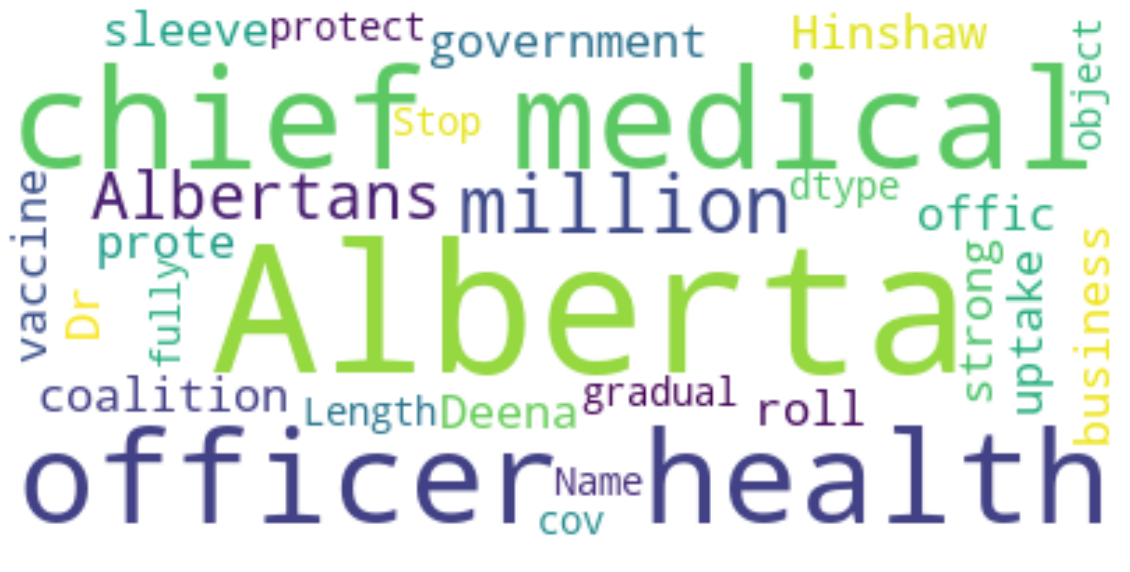

In [11]:
#using word clouds to more easily visualize at a glance the most common words by province
#this code based on tutorial: https://www.pluralsight.com/guides/natural-language-processing-visualizing-text-data-using-word-cloud

wordcloud_AB_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='AB'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_AB_original, interpolation='bilinear')
plt.axis("off")
plt.show()

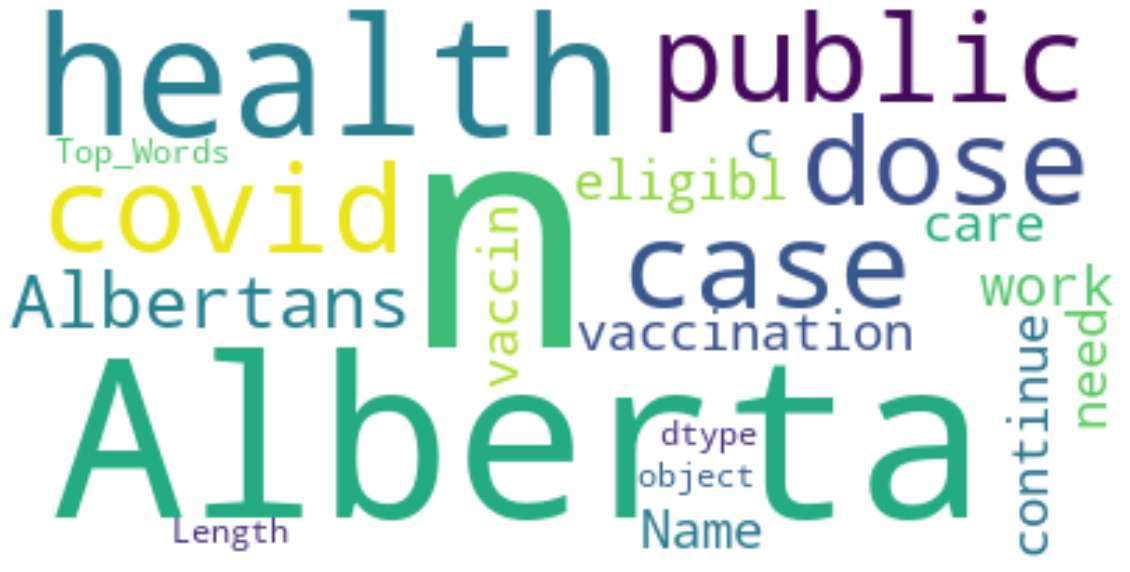

In [12]:
wordcloud_AB = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='AB'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_AB, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: BC

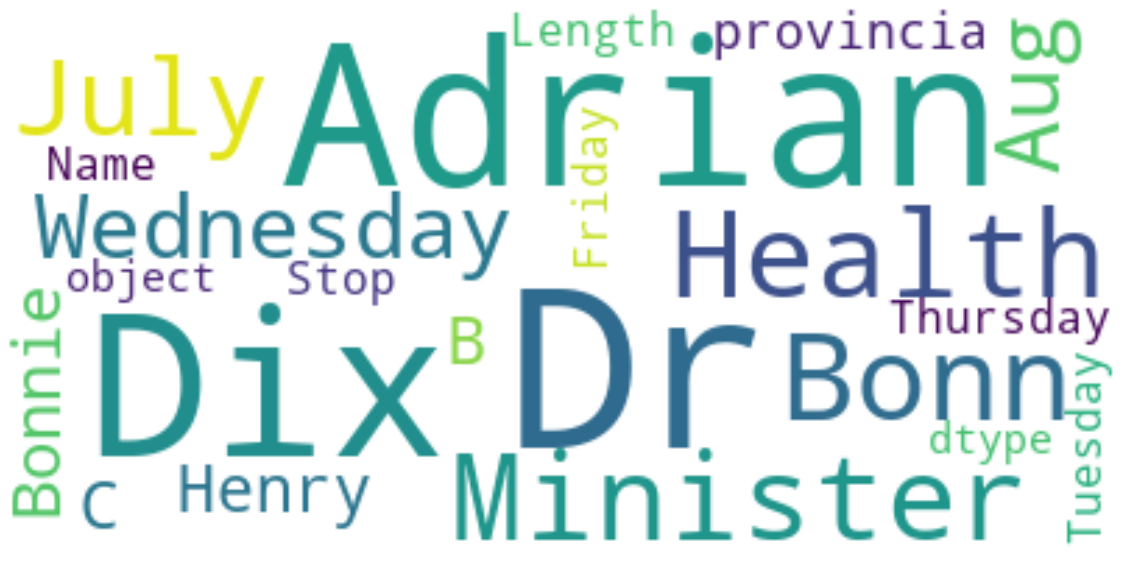

In [13]:
wordcloud_BC_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='BC'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_BC_original, interpolation='bilinear')
plt.axis("off")
plt.show()

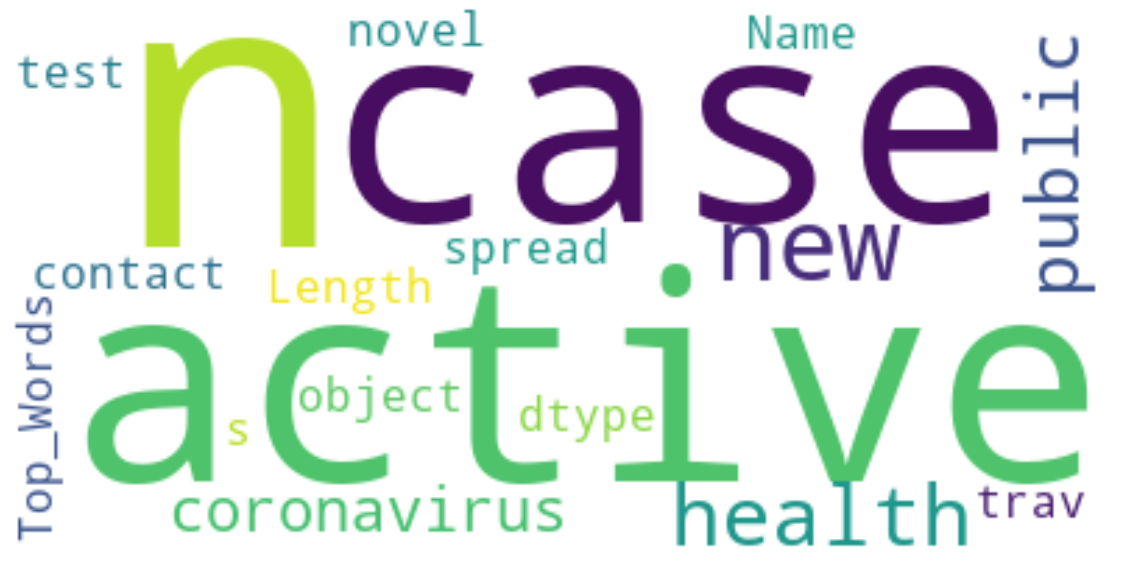

In [14]:
wordcloud_BC = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='BC'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_BC, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: MB

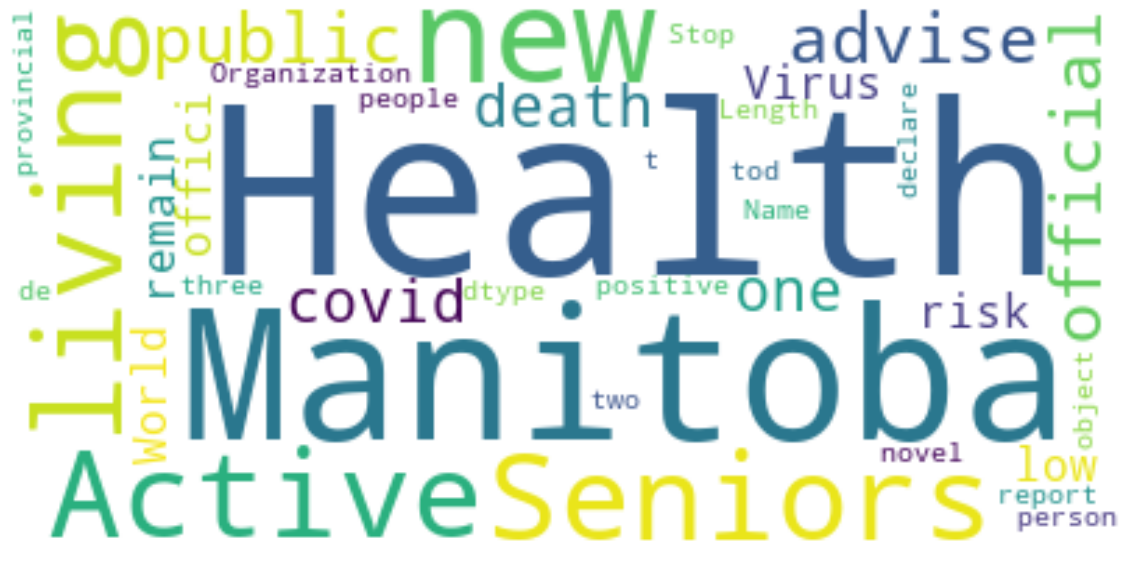

In [15]:
wordcloud_MB_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='MB'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_MB_original, interpolation='bilinear')
plt.axis("off")
plt.show()

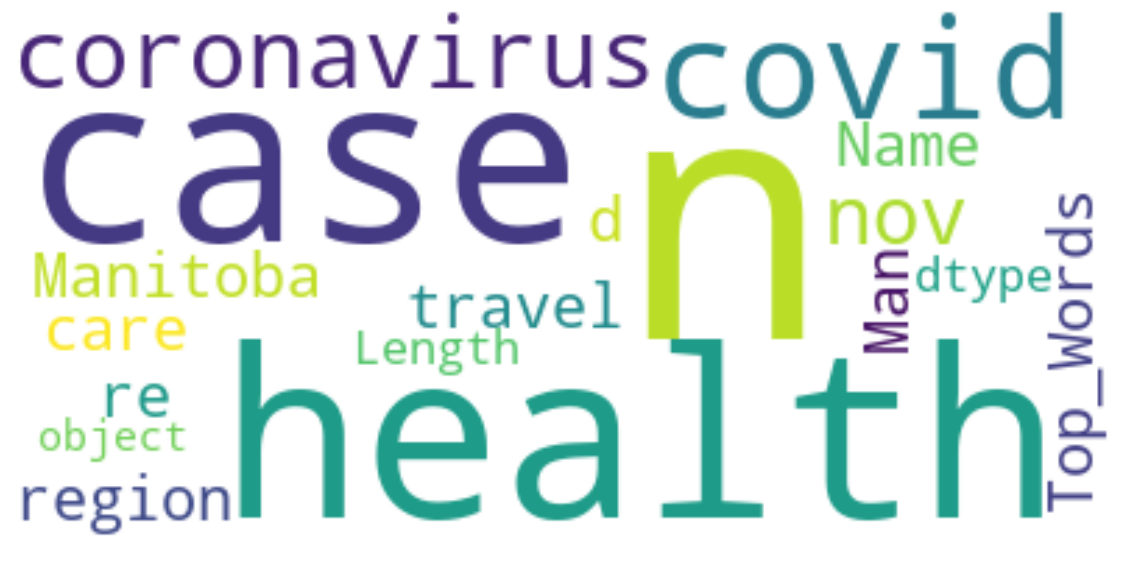

In [16]:
wordcloud_MB = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='MB'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_MB, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: NB

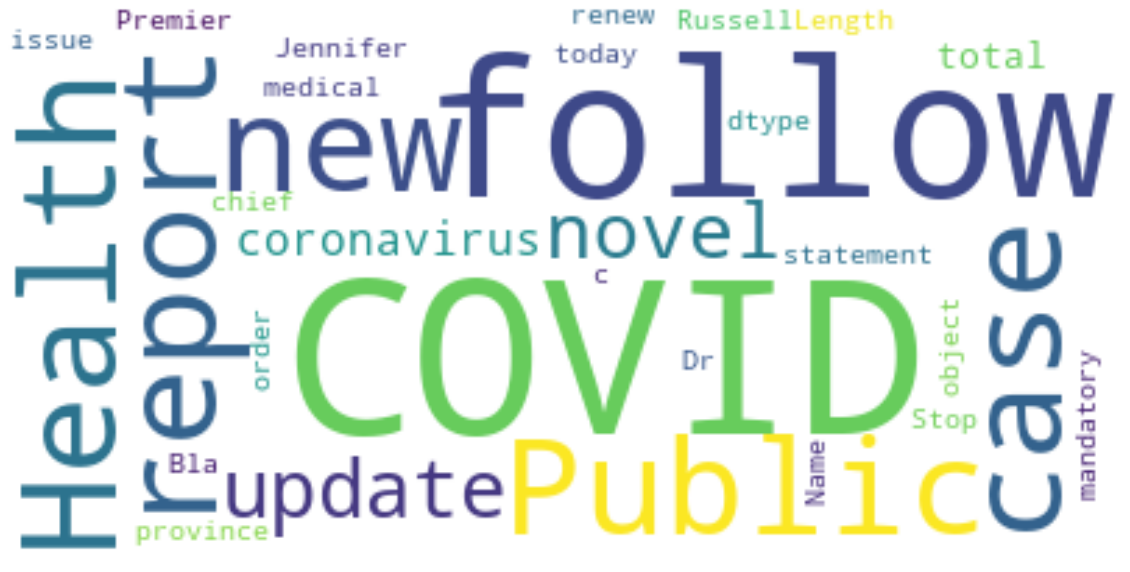

In [17]:
wordcloud_NB_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='NB'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NB_original, interpolation='bilinear')
plt.axis("off")
plt.show()

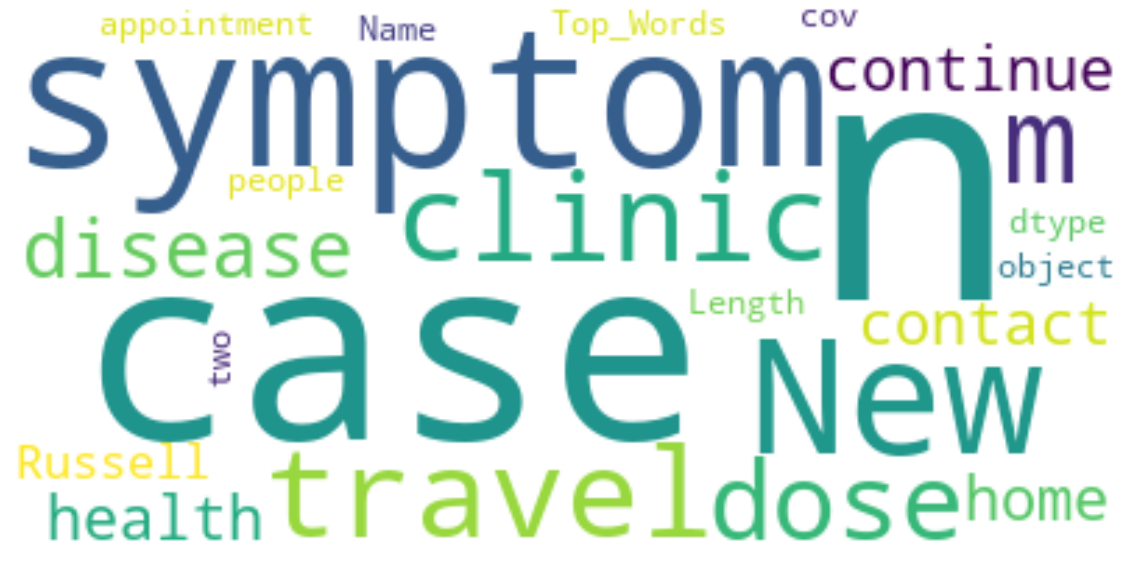

In [18]:
wordcloud_NB = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='NB'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NB, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: NL

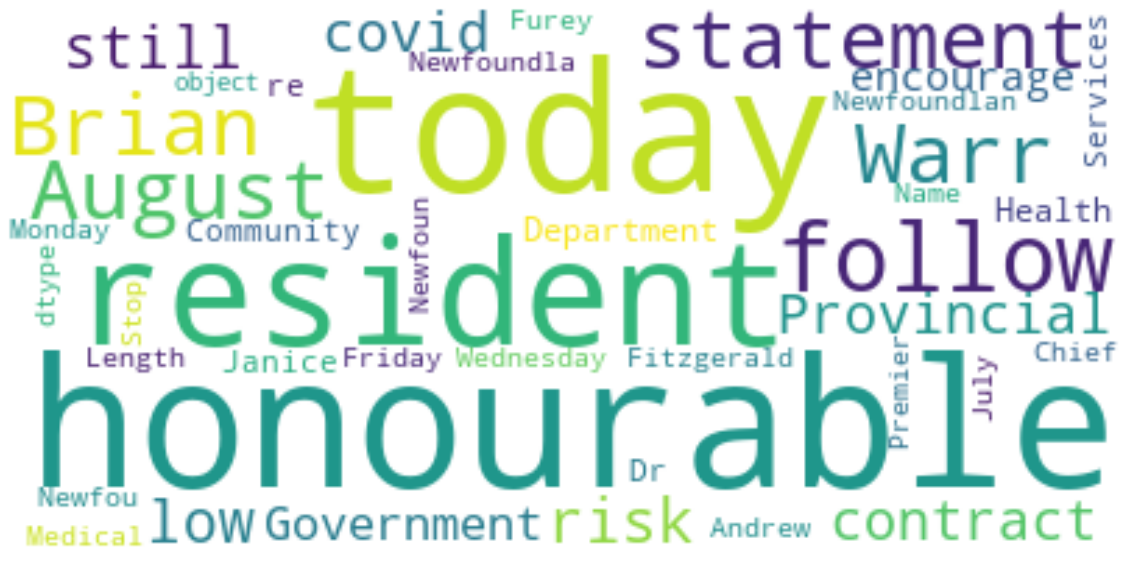

In [19]:
wordcloud_NL_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='NL'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NL_original, interpolation='bilinear')
plt.axis("off")
plt.show()

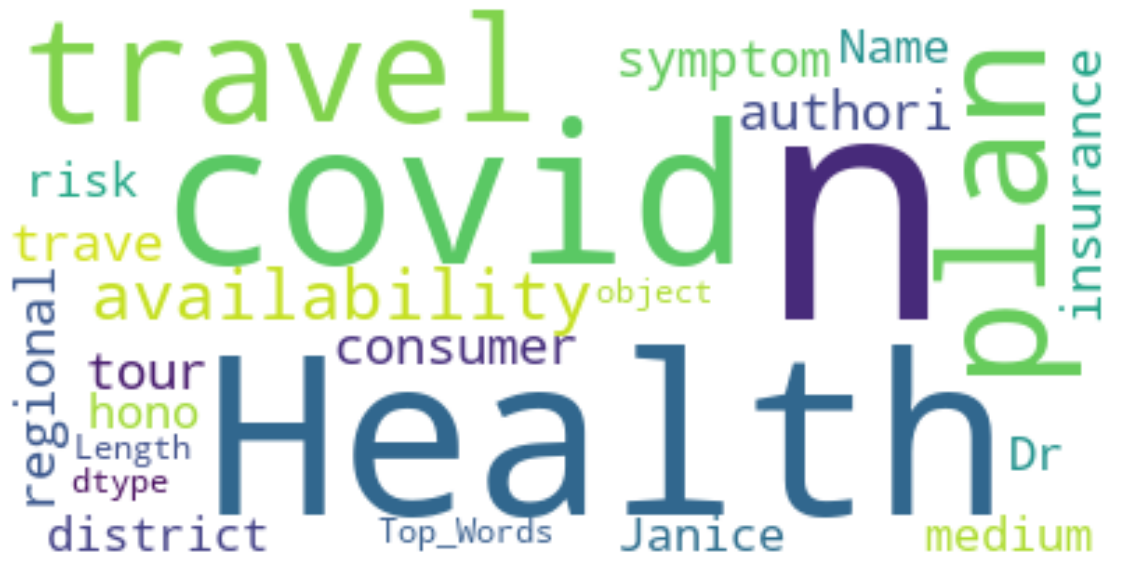

In [20]:
wordcloud_NL = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='NL'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NL, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: NS

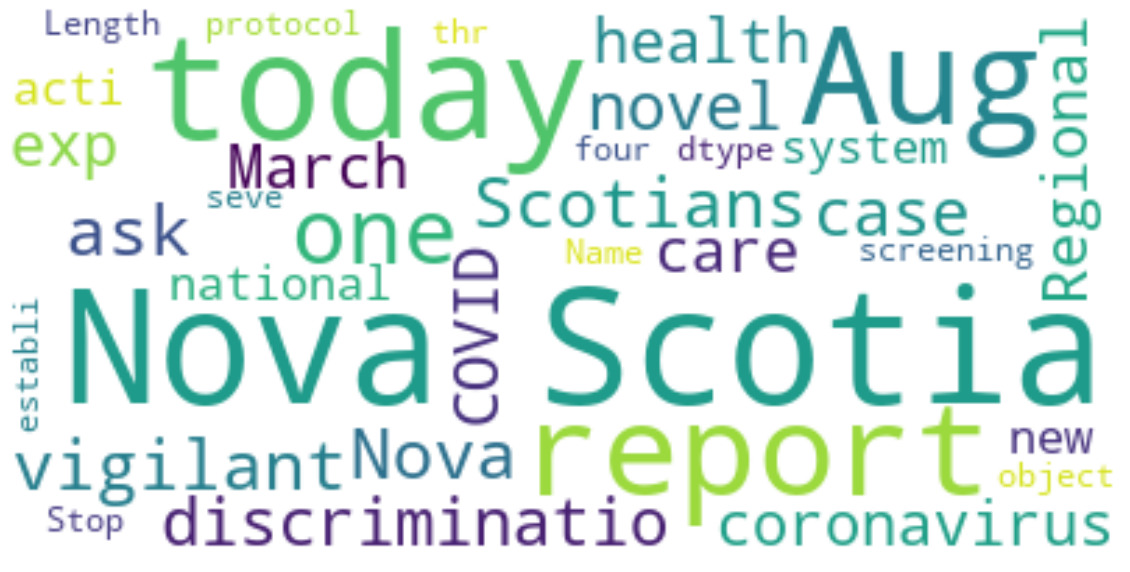

In [21]:
wordcloud_NS_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='NS'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NS_original, interpolation='bilinear')
plt.axis("off")
plt.show()

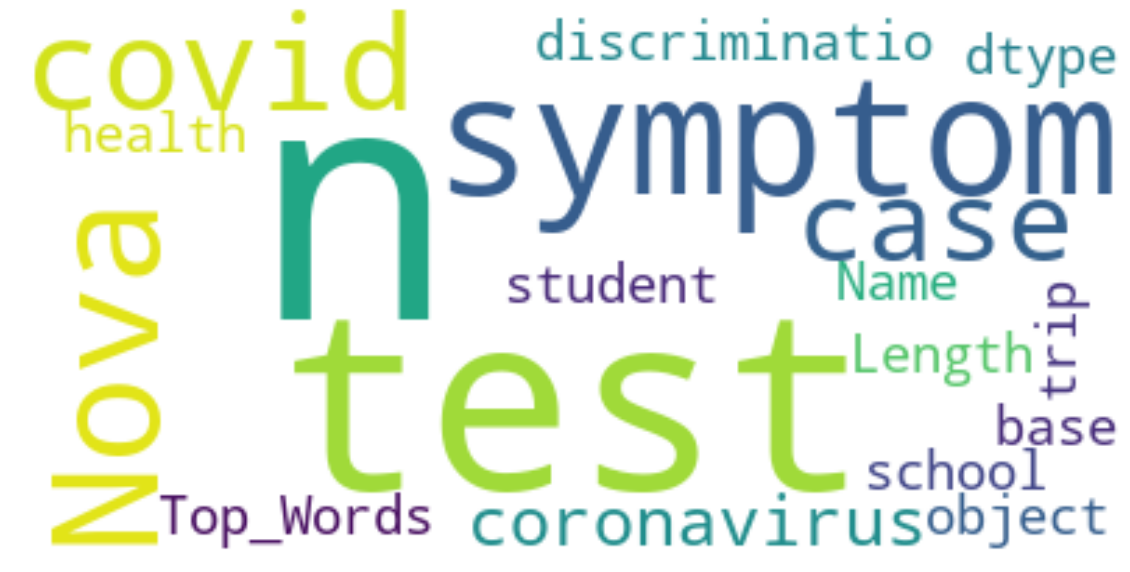

In [22]:
wordcloud_NS = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='NS'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NS, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: NT

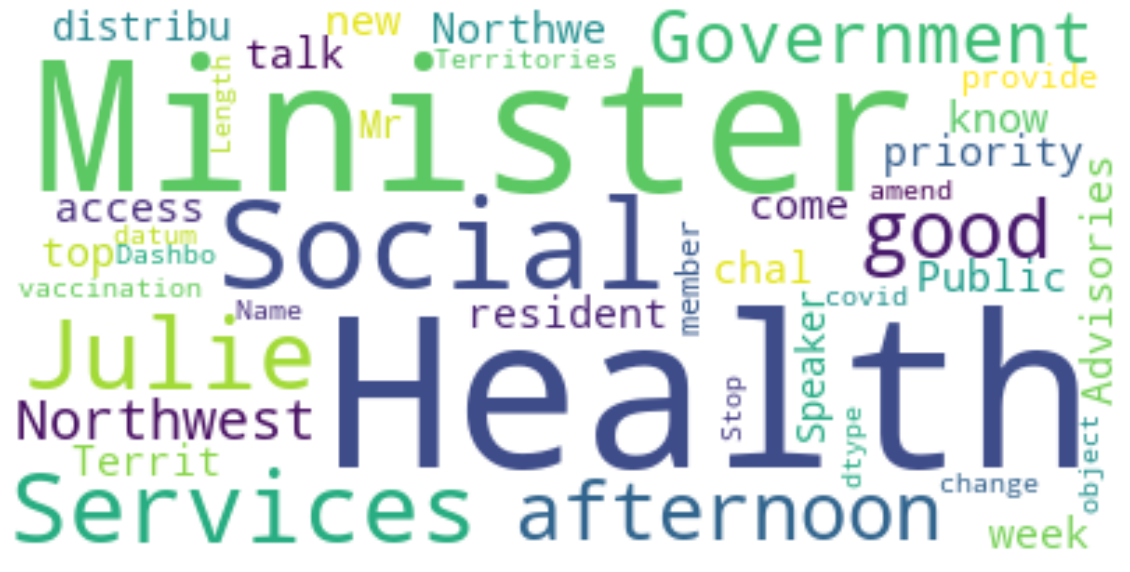

In [23]:
wordcloud_NT_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='NT'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NT_original, interpolation='bilinear')
plt.axis("off")
plt.show()

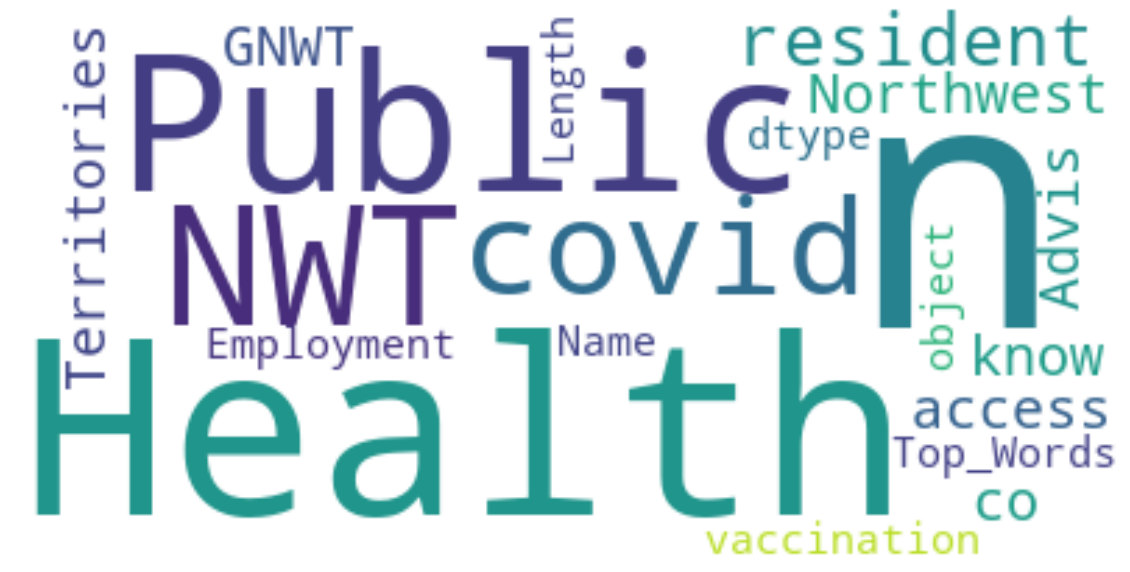

In [24]:
wordcloud_NT = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='NT'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NT, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: NU

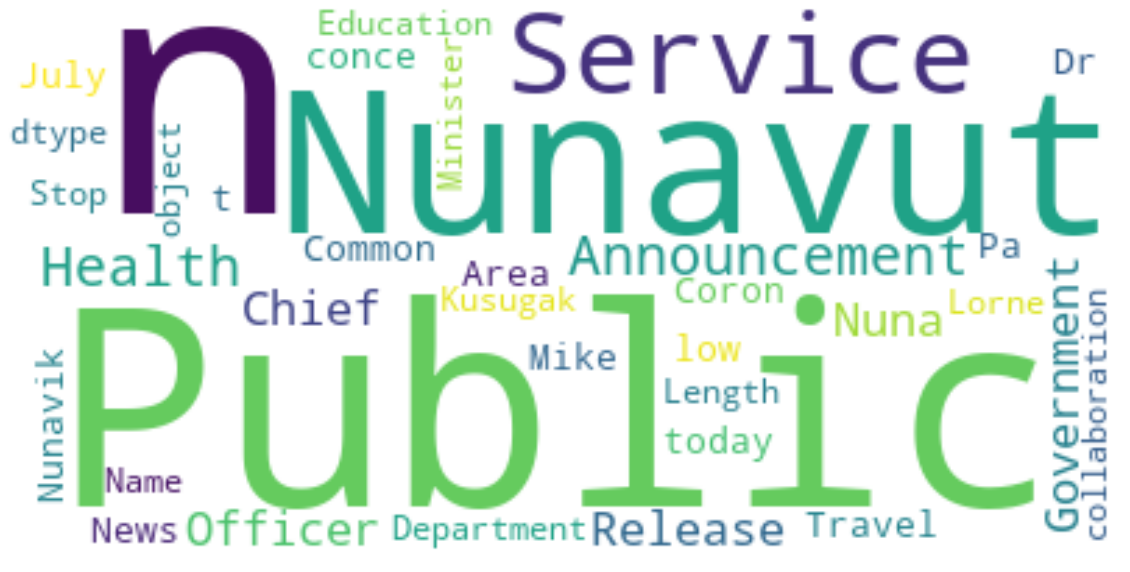

In [25]:
wordcloud_NU_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='NU'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NU_original, interpolation='bilinear')
plt.axis("off")
plt.show()

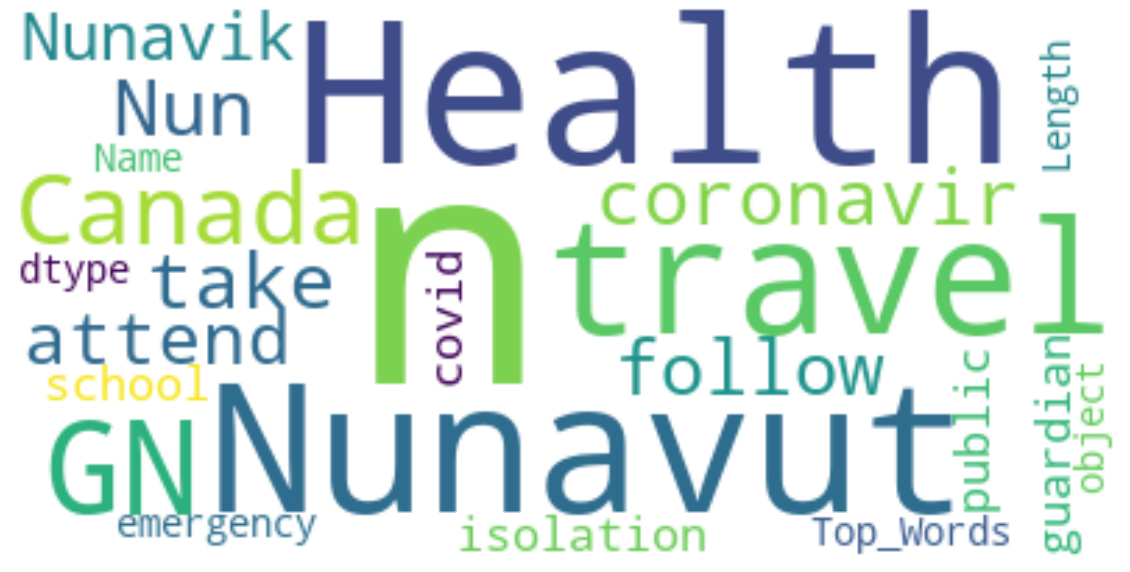

In [26]:
wordcloud_NU = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='NU'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_NU, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: ON

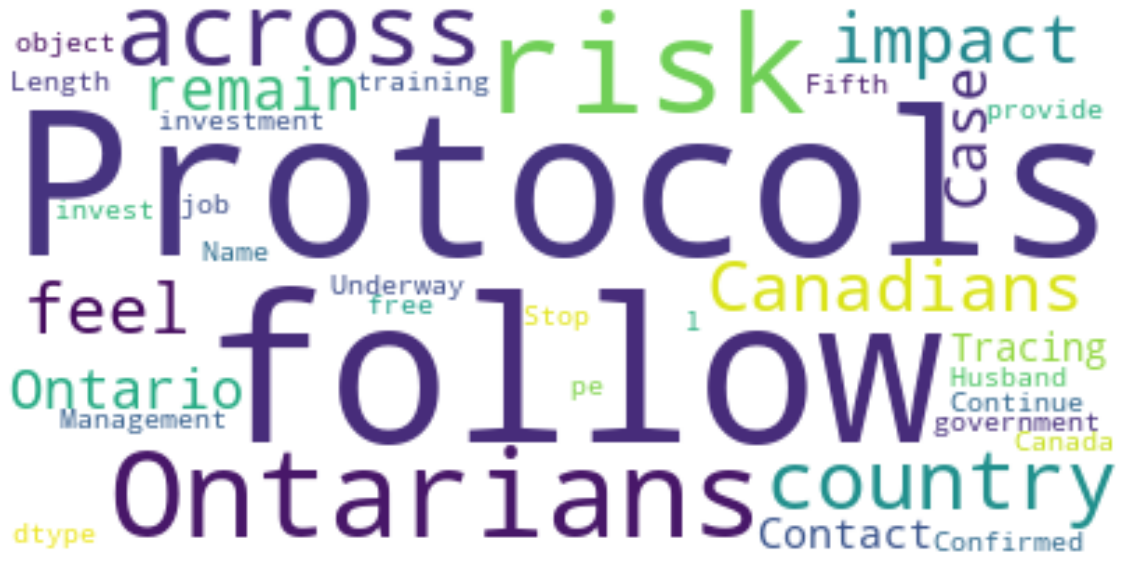

In [27]:
wordcloud_ON_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='ON'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_ON_original, interpolation='bilinear')
plt.axis("off")
plt.show()

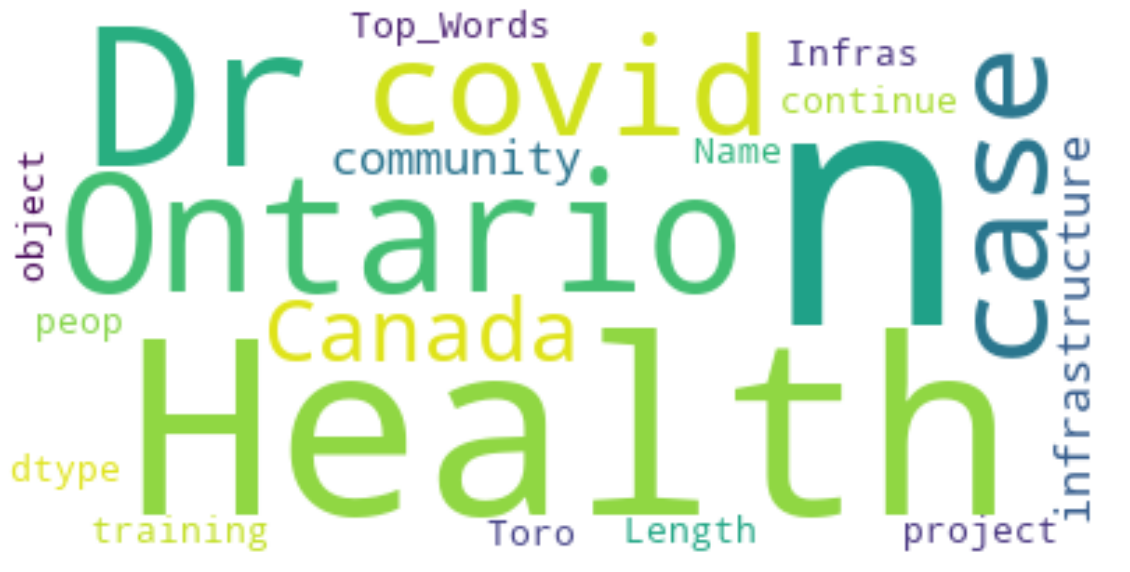

In [28]:
wordcloud_ON = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='ON'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_ON, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: PEI

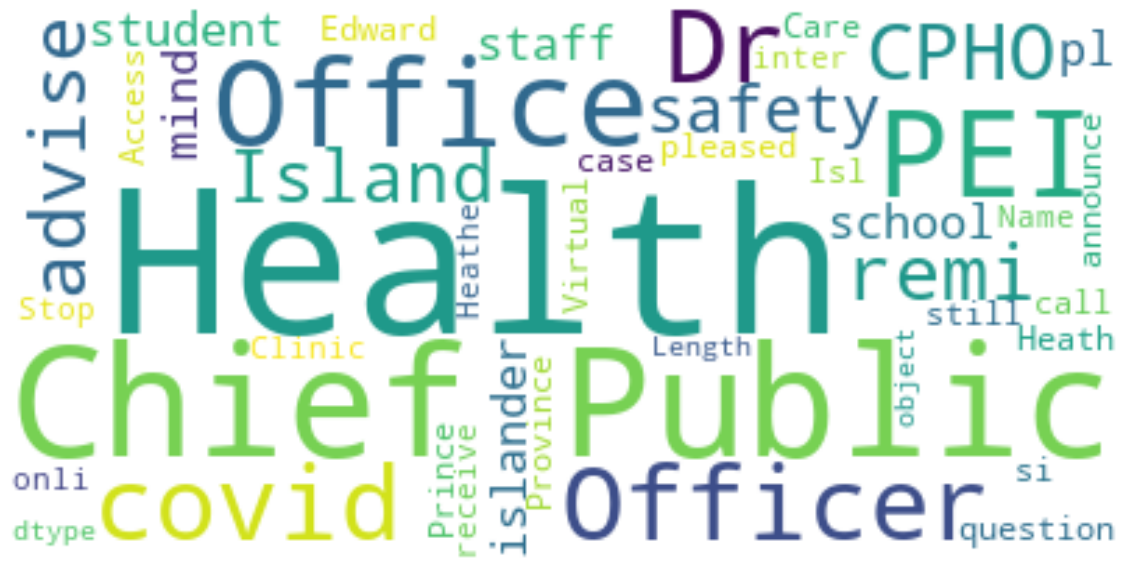

In [29]:
wordcloud_PEI_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='PEI'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_PEI_original, interpolation='bilinear')
plt.axis("off")
plt.show()

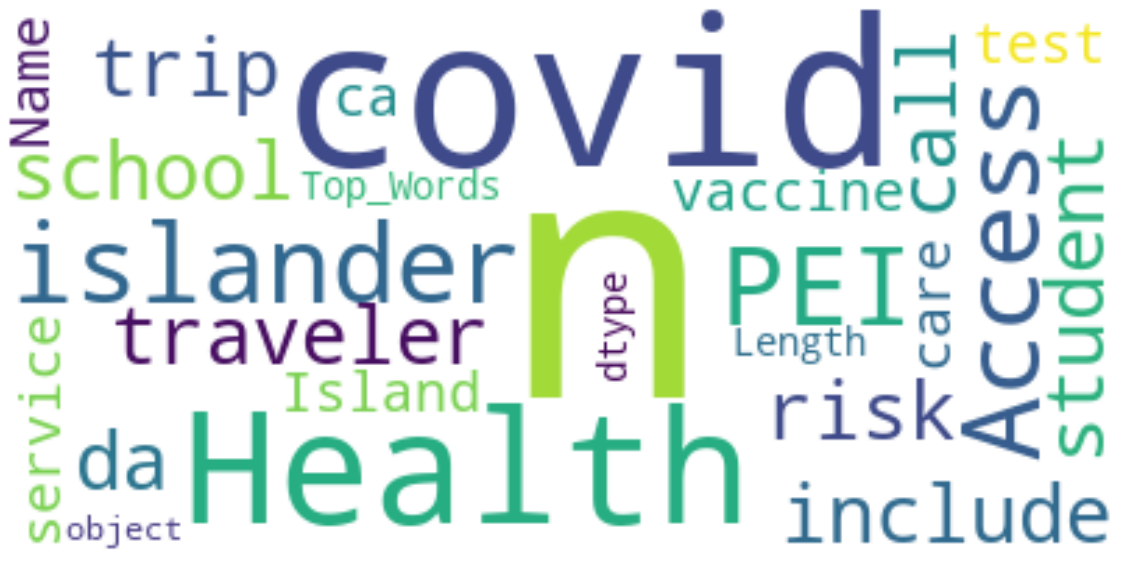

In [30]:
wordcloud_PEI = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='PEI'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_PEI, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: QC

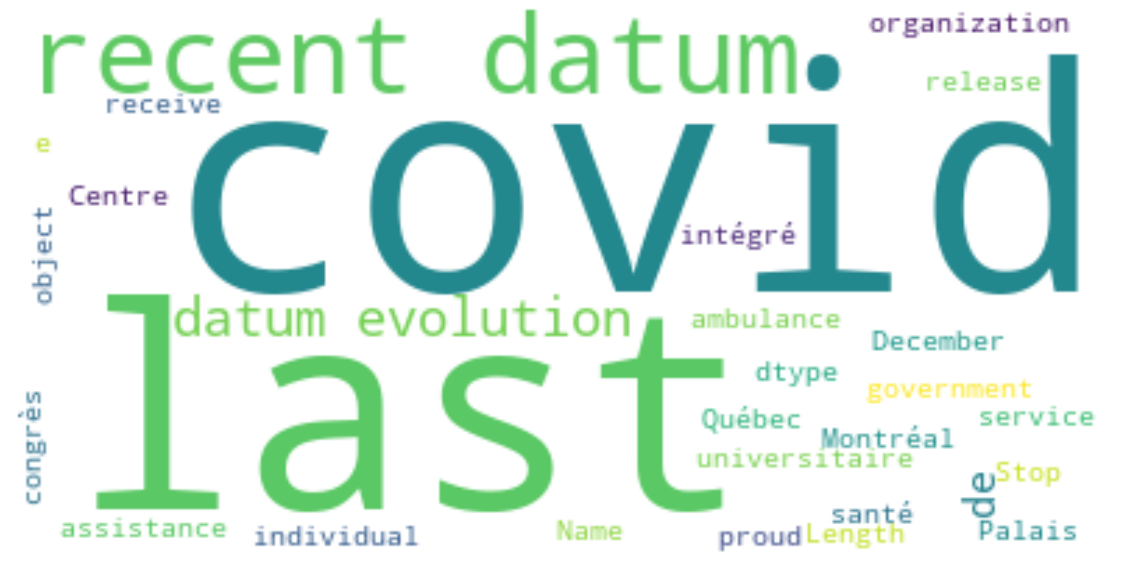

In [31]:
wordcloud_QC_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='QC'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_QC_original, interpolation='bilinear')
plt.axis("off")
plt.show()

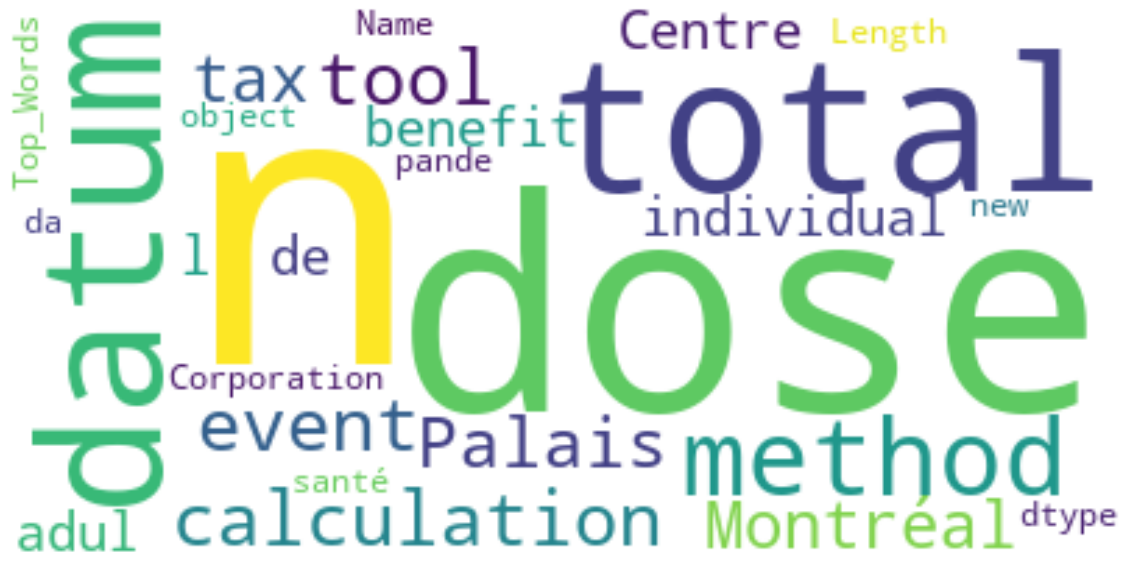

In [32]:
wordcloud_QC = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='QC'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_QC, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: SK

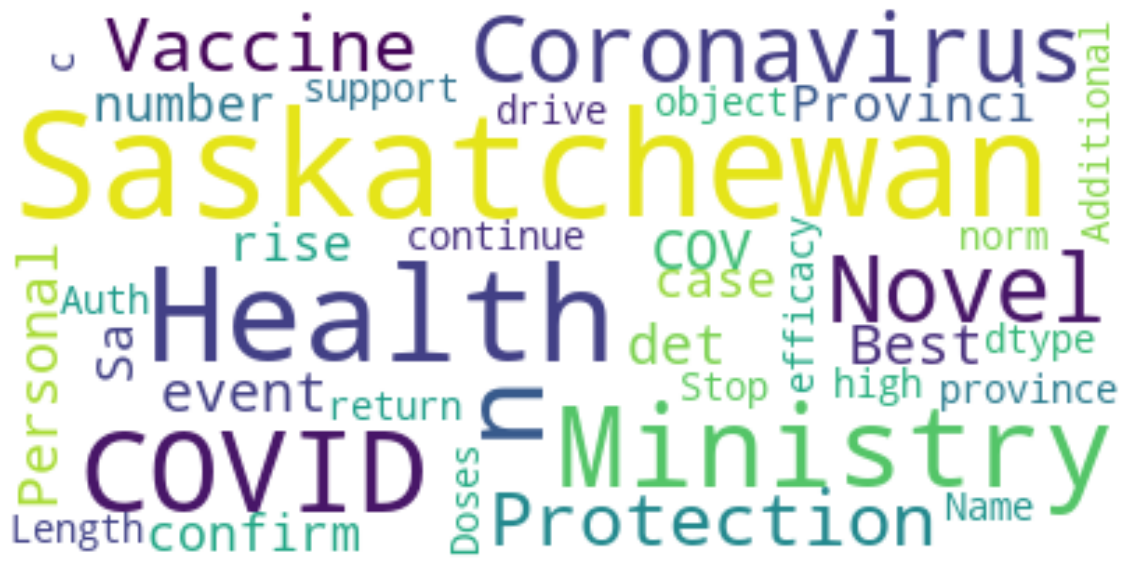

In [33]:
wordcloud_SK_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='SK'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_SK_original, interpolation='bilinear')
plt.axis("off")
plt.show()

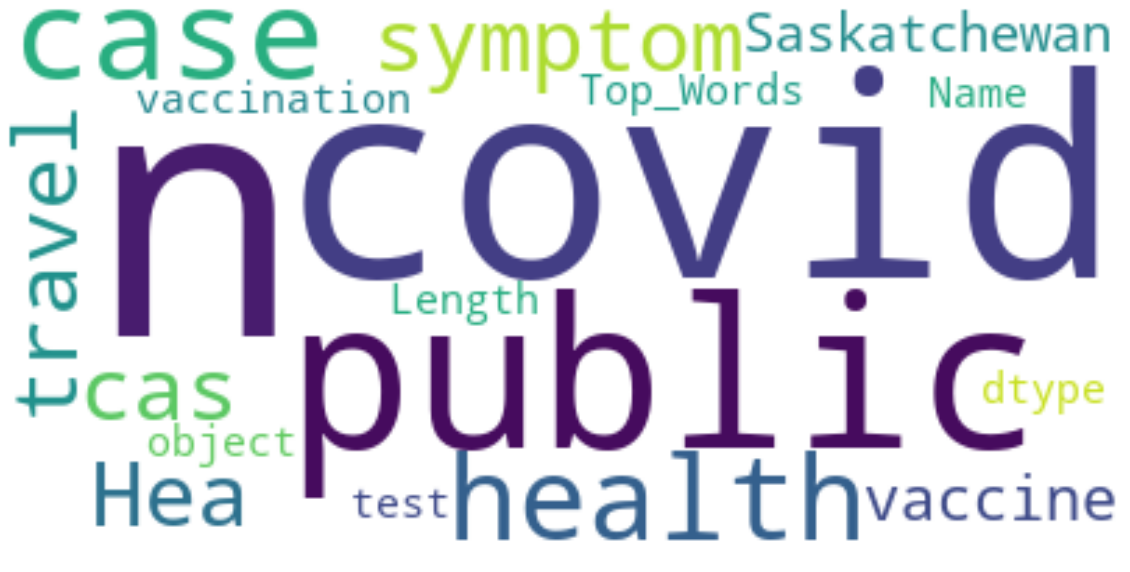

In [34]:
wordcloud_SK = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='SK'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_SK, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud: YT

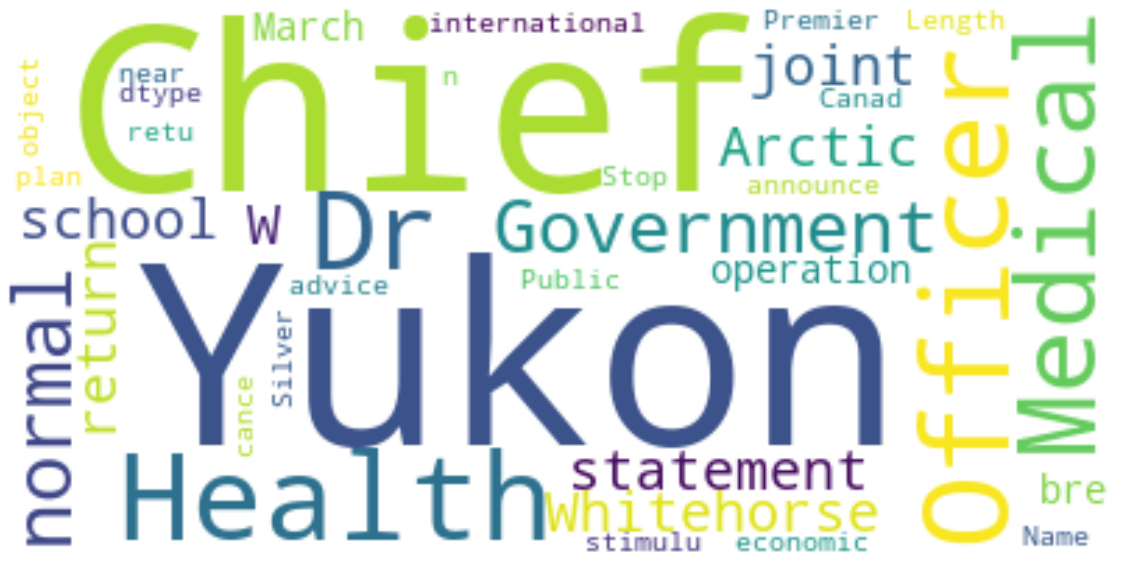

In [35]:
wordcloud_YT_original = WordCloud(background_color="white").generate(str(df_reports.loc[df_reports.Province=='YT'].Stop))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_YT_original, interpolation='bilinear')
plt.axis("off")
plt.show()

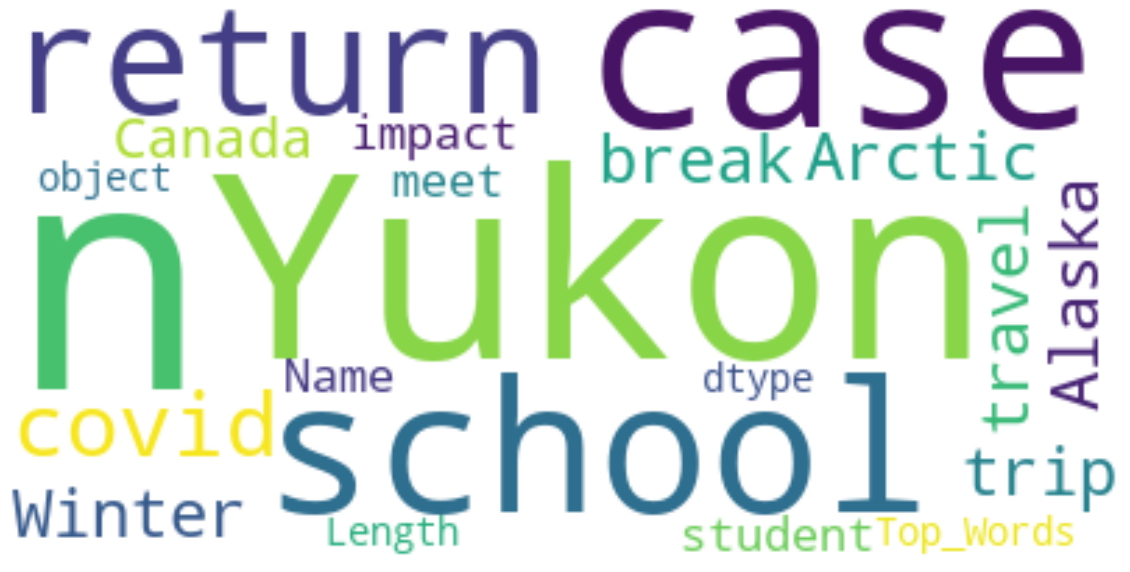

In [36]:
wordcloud_YT = WordCloud(background_color="white").generate(str(words_frame.loc[words_frame.Province=='YT'].Top_Words))

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_YT, interpolation='bilinear')
plt.axis("off")
plt.show()

Overall, there does seem to be some differences between the provinces/territories in the words used. For example, "infrastructure", "school"/"student", "senior" and "travel" seem more important for some provinces than others. Some seem to use connecting words like "community", "islander", or "Albertans" and some seem to use a lot of specific names of health ministers or officers like "Adrian", "Bonnie", "Julie" whereas for other provinces specific names don't show up in the word clouds at all.

## Finding Common Entities by Province

What are the most common entities? Creating a dataframe of entity frequencies by province might be useful for checking if different frequencies of entity types relate to case counts. 

In [37]:
#to find most common entities by province, using code from:
#https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

nlp = spacy.load("en_core_web_sm")

province_entities = []
    
def get_entities(province):
    for sentence in df_reports.loc[df_reports.Province==province].Stop:
        temp_entity_name = ''
        temp_named_entity = None
        sentence = nlp(sentence)
        for word in sentence:
            term = word.text 
            tag = word.ent_type_
            if tag:
                temp_entity_name = ' '.join([temp_entity_name, term]).strip()
                temp_named_entity = (province, temp_entity_name, tag)
            else:
                if temp_named_entity:
                    province_entities.append(temp_named_entity)
                    temp_entity_name = ''
                    temp_named_entity = None
    return province_entities

for province in prov:
    get_entities(province)

#create dataframe for entities
entities_frame = pd.DataFrame(province_entities, 
                            columns=['Province', 'Entity Name', 'Entity Type'])

Most common entities by frequency:

In [38]:
#get most common entities
common_entities = (entities_frame.groupby(by=['Province','Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most frequent entity names overall
common_entities.iloc[:30, :]
#common_entities.T.iloc[:,:30]

Province       Entity Name Entity Type  Frequency
0        ON           Ontario         GPE       3284
1        SK      Saskatchewan         GPE       3218
2        NL               \\n         ORG       2979
3        AB               \\n         ORG       2545
4        MB             \\n •         ORG       2403
5        AB           Alberta         GPE       2325
6       CAN            Canada         GPE       2141
7        BC               \\n         ORG       2127
8        NS               \\n         ORG       2106
9        MB           \\n \\n         ORG       1968
10       AB         Albertans        NORP       1813
11       SK                 1    CARDINAL       1747
12       NS          covid-19    CARDINAL       1557
13       MB          covid-19    CARDINAL       1496
14      CAN         Canadians        NORP       1405
15       BC          covid-19    CARDINAL       1402
16       MB          Manitoba         GPE       1356
17       NS            14 day        DATE       1308
18       BC  British Columbia         GPE       1293
19       NS              Nova         ORG       1188
20       ON            Canada         GPE       1175
21       SK            Regina         LOC       1127
22       BC              B.C.         GPE       1121
23       NL     Public Health         ORG       1091
24       AB          covid-19    CARDINAL       1070
25       SK     North Central         LOC       1063
26       ON         Ontarians        NORP       1045
27       ON               \\n         ORG       1039
28       NL          covid-19    CARDINAL       1009
29       NB               \\n         ORG        995

Most common entities grouped by entity type and province:

In [39]:
common_entities = (entities_frame.groupby(by=['Entity Type', 'Province'])
                           .size()
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show frequency of different entity types by province/territory
common_entities.iloc[:30, :]

Entity Type Province  Frequency
0     CARDINAL       AB      11022
1     CARDINAL       BC       8604
2     CARDINAL      CAN       3308
3     CARDINAL    CAN-N        762
4     CARDINAL       MB       8057
5     CARDINAL       NB       9174
6     CARDINAL       NL       4965
7     CARDINAL       NS       8403
8     CARDINAL       NT        662
9     CARDINAL       NU       1241
10    CARDINAL       ON       6663
11    CARDINAL      PEI       2035
12    CARDINAL       QC       1454
13    CARDINAL       SK      26903
14    CARDINAL       YT       2515
15        DATE       AB       5825
16        DATE       BC       3041
17        DATE      CAN       4224
18        DATE    CAN-N       1073
19        DATE       MB       4828
20        DATE       NB       3439
21        DATE       NL       3558
22        DATE       NS       7912
23        DATE       NT       1090
24        DATE       NU       1362
25        DATE       ON       7573
26        DATE      PEI       1804
27        DATE       QC        719
28        DATE       SK       7678
29        DATE       YT       1727

Most common entities grouped by province and then entity type:

In [40]:
common_entities = (entities_frame.groupby(by=['Province', 'Entity Type'])
                           .size()
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show frequency of different entity types by province/territory
common_entities.iloc[:30, :]

#could maybe add frequency as a column to entities_frame and calculate relative frequencies either by average word count for a province or by relative use of that entity type in other provincess

Province  Entity Type  Frequency
0        AB     CARDINAL      11022
1        AB         DATE       5825
2        AB        EVENT          3
3        AB          FAC         83
4        AB          GPE       3772
5        AB     LANGUAGE          4
6        AB          LAW         36
7        AB          LOC        447
8        AB        MONEY       1047
9        AB         NORP       2572
10       AB      ORDINAL        704
11       AB          ORG      11386
12       AB      PERCENT         65
13       AB       PERSON       1484
14       AB      PRODUCT        189
15       AB     QUANTITY        259
16       AB         TIME       1167
17       AB  WORK_OF_ART         33
18       BC     CARDINAL       8604
19       BC         DATE       3041
20       BC        EVENT         30
21       BC          FAC        105
22       BC          GPE       3444
23       BC     LANGUAGE          1
24       BC          LAW          7
25       BC          LOC        697
26       BC        MONEY         64
27       BC         NORP        131
28       BC      ORDINAL        471
29       BC          ORG       6710

In [41]:
entities_frame.to_csv(r'../Data/entities.csv')

## Examples of Entities Found in Reports from Different Provinces

### Example of Entities: Alberta

In [42]:
common_entities = (entities_frame.loc[entities_frame.Province=='AB'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG      11386
1      CARDINAL      11022
2          DATE       5825
3           GPE       3772
4          NORP       2572
5        PERSON       1484
6          TIME       1167
7         MONEY       1047
8       ORDINAL        704
9           LOC        447
10     QUANTITY        259
11      PRODUCT        189
12          FAC         83
13      PERCENT         65
14          LAW         36
15  WORK_OF_ART         33
16     LANGUAGE          4
17        EVENT          3

In [43]:
#https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
#documentation: https://spacy.io/api/data-formats#named-entities
report = str(df_reports.iloc[0].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Alberta, 'GPE'), (first, 'ORDINAL'), (fifty, 'CARDINAL'), (Calgary, 'GPE'), (Albertans, 'NORP'), (Albertans, 'NORP'), (Deena, 'PERSON'), (Hinshaw, 'PERSON'), (Alberta, 'GPE'), (week, 'DATE'), (Health, 'PERSON'), (\\n, 'PERSON'), (California, 'GPE'), (March, 'DATE'), (5, 'DATE'), (Alberta, 'GPE'), (last, 'DATE'), (two, 'DATE'), (week, 'DATE'), (14, 'DATE'), (day, 'DATE'), (January, 'DATE'), (Alberta, 'GPE'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (covid-19, 'DATE'), (Alberta, 'GPE'), (Health, 'ORG'), (Alberta, 'ORG'), (Health, 'ORG'), (Services, 'ORG'), (Alberta, 'GPE'), (\\n, 'ORG'), (Albertans, 'NORP'), (covid-19, 'CARDINAL'), (covid-19, 'CARDINAL'), (Health, 'PRODUCT'), (Link, 'PRODUCT'), (811, 'PRODUCT')]


### Example of Entities: BC

In [44]:
common_entities = (entities_frame.loc[entities_frame.Province=='BC'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0      CARDINAL       8604
1           ORG       6710
2           GPE       3444
3          DATE       3041
4        PERSON       1916
5           LOC        697
6       ORDINAL        471
7          TIME        311
8       PERCENT        191
9          NORP        131
10          FAC        105
11      PRODUCT         79
12        MONEY         64
13  WORK_OF_ART         62
14        EVENT         30
15     QUANTITY         21
16          LAW          7
17     LANGUAGE          1

In [45]:
df_reports.loc[df_reports.Province=='BC'].head()

report = str(df_reports.iloc[505].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Health, 'PERSON'), (Bonnie, 'PERSON'), (Henry, 'PERSON'), (B.C., 'GPE'), (\\n, 'ORG'), (\\n, 'ORG'), (", 'ORG'), (BC, 'ORG'), (Centre, 'ORG'), (Disease, 'ORG'), (Control, 'ORG'), (british, 'ORG'), (Columbians, 'ORG'), (Wuhan, 'GPE'), (city, 'GPE'), (China, 'GPE'), (China, 'GPE'), (Japan, 'GPE'), (Taiwan, 'GPE'), (South, 'GPE'), (Korea, 'GPE'), (Thailand, 'GPE'), (today, 'DATE'), (United, 'ORG'), (States, 'ORG'), (Centre, 'ORG'), (Disease, 'ORG'), (Control, 'ORG'), (Washington, 'ORG'), (State, 'ORG'), (Wuhan, 'GPE'), (British, 'GPE'), (Columbia, 'GPE'), (Canada, 'GPE'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (Vancouver, 'FAC'), (International, 'FAC'), (Airport, 'FAC'), (Richmond, 'ORG'), (Hospital, 'ORG'), (\\n, 'ORG'), (", 'ORG'), (BC, 'ORG'), (Centre, 'ORG'), (Disease, 'ORG'), (Control, 'ORG'), (\\n, 'ORG'), (", 'ORG'), (Canada, 'ORG'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (World, 'ORG'), (Health, 'ORG'), (Organization, 'OR

### Example of Entities: MB

In [46]:
common_entities = (entities_frame.loc[entities_frame.Province=='MB'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG      10564
1      CARDINAL       8057
2          DATE       4828
3           GPE       1993
4        PERSON       1658
5       PRODUCT       1194
6          NORP        937
7         MONEY        417
8          TIME        312
9           LOC        263
10      ORDINAL        178
11          FAC        148
12     QUANTITY         58
13  WORK_OF_ART         52
14        EVENT         13
15     LANGUAGE          3
16          LAW          2

In [47]:
df_reports.loc[df_reports.Province=='MB'].head()

report = str(df_reports.iloc[1018].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Manitoba, 'GPE'), (Manitoba, 'GPE'), (Health, 'ORG'), (,, 'ORG'), (Seniors, 'ORG'), (active, 'ORG'), (Living, 'ORG'), (Cameron, 'PERSON'), (Friesen, 'PERSON'), (today, 'DATE'), (Manitoba, 'GPE'), (Friesen, 'PERSON'), (911, 'CARDINAL'), (first, 'ORDINAL'), (past, 'DATE'), (14, 'DATE'), (day, 'DATE'), (Wuhan, 'GPE'), (China, 'GPE'), (first, 'ORDINAL'), (first, 'ORG'), (responder, 'ORG'), (Manitoba, 'GPE'), (two, 'CARDINAL'), (canadian, 'NORP'), (Toronto, 'GPE'), (Wuhan, 'GPE'), (two, 'CARDINAL'), (Manitoba, 'GPE'), (recent, 'DATE'), (day, 'DATE'), (Friesen, 'PERSON'), (National, 'ORG'), (Microbiology, 'ORG'), (Laboratory, 'ORG'), (Manitobans, 'NORP'), (Manitoba, 'GPE'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (World, 'ORG'), (Health, 'ORG'), (Organization, 'ORG'), (Global, 'ORG'), (Affairs, 'ORG'), (Canada, 'ORG'), (Monday, 'DATE'), (Canadians, 'NORP'), (Hubei, 'GPE'), (province, 'GPE'), (China, 'GPE'), (Wuhan, 'GPE'), (Wuhan, 'GPE'), (symptom, 'ORG'), (coug

### Example of Entities: NB

In [48]:
common_entities = (entities_frame.loc[entities_frame.Province=='NB'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0      CARDINAL       9174
1           ORG       4280
2          DATE       3439
3           GPE       2402
4        PERSON       2145
5       ORDINAL        717
6          TIME        367
7           FAC        155
8          NORP        147
9         MONEY        138
10      PRODUCT        134
11          LOC         96
12     QUANTITY         80
13  WORK_OF_ART         16
14          LAW          9
15        EVENT          4
16     LANGUAGE          3
17      PERCENT          2

In [49]:
df_reports.loc[df_reports.Province=='NB'].head()

report = str(df_reports.iloc[1605].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(today, 'DATE'), (Blaine, 'PERSON'), (Higgs, 'PERSON'), (covid-19, 'CARDINAL'), (covid-19, 'DATE'), (first, 'ORDINAL'), (Wuhan, 'GPE'), (Hubei, 'GPE'), (China, 'GPE'), (Canada, 'GPE'), (United, 'GPE'), (States, 'GPE'), (today, 'DATE'), (New, 'GPE'), (Brunswick, 'GPE'), (New, 'GPE'), (Brunswick, 'GPE'), (March, 'DATE'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (New, 'GPE'), (Brunswick, 'GPE'), (one, 'CARDINAL'), (Tele, 'ORG'), (-, 'ORG'), (Care, 'ORG'), (8, 'ORG'), (-, 'ORG'), (1, 'ORG'), (New, 'ORG'), (Brunswickers, 'ORG'), (first, 'ORDINAL'), (New, 'ORG'), (Brunswickers, 'ORG'), (daily, 'DATE'), (Public, 'ORG'), (Health, 'ORG'), (Emergency, 'ORG'), (Measures, 'ORG'), (Organization, 'ORG'), (Saskatchewan, 'GPE'), (Scott, 'PERSON'), (Moe, 'PERSON'), (Council, 'ORG'), (Federation, 'ORG'), (Canadians, 'NORP'), (New, 'GPE'), (Brunswick, 'GPE')]


### Example of Entities: NL

In [50]:
common_entities = (entities_frame.loc[entities_frame.Province=='NL'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG       9676
1      CARDINAL       4965
2          DATE       3558
3        PERSON       1286
4           GPE        563
5           LOC        403
6       ORDINAL        362
7          NORP        244
8          TIME        231
9         MONEY        115
10          FAC         72
11     QUANTITY         54
12      PRODUCT         31
13  WORK_OF_ART          9
14        EVENT          8
15      PERCENT          6
16          LAW          6
17     LANGUAGE          1

In [51]:
df_reports.loc[df_reports.Province=='NL'].head()

report = str(df_reports.iloc[2102].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(covid-19, 'DATE'), (symptom, 'PERSON'), (14, 'DATE'), (day, 'DATE'), (\\n, 'ORG'), (Cough, 'ORG'), (\\n, 'ORG'), (Difficulty, 'ORG'), (811, 'CARDINAL'), (Healthline, 'GPE'), (911, 'CARDINAL'), (Newfoundland, 'PERSON'), (Labrador, 'PERSON'), (Department, 'ORG'), (Health, 'ORG'), (Community, 'ORG'), (ServicesOpens, 'ORG'), (Newfoundland, 'PERSON'), (Labrador, 'PERSON')]


### Example of Entities: NS

In [52]:
common_entities = (entities_frame.loc[entities_frame.Province=='NS'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG       9445
1      CARDINAL       8403
2          DATE       7912
3        PERSON       2047
4          NORP       1235
5           LOC       1143
6           GPE        792
7       ORDINAL        658
8          TIME        615
9         MONEY        366
10     QUANTITY        144
11          FAC        106
12      PRODUCT         68
13  WORK_OF_ART         21
14          LAW         10
15        EVENT          7
16      PERCENT          3

In [53]:
df_reports.loc[df_reports.Province=='NS'].head()

report = str(df_reports.iloc[2744].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Scotians, 'NORP'), (chinese, 'NORP'), (Nova, 'PERSON'), (Scotians, 'PERSON'), (Nova, 'ORG'), (Scotia, 'ORG'), (Human, 'ORG'), (Rights, 'ORG'), (Act, 'ORG'), (Human, 'ORG'), (Rights, 'ORG'), (Commission, 'ORG'), (Nova, 'ORG'), (Scotia, 'ORG'), (Human, 'ORG'), (Rights, 'ORG'), (Commission, 'ORG')]


### Example of Entities: NT

In [54]:
common_entities = (entities_frame.loc[entities_frame.Province=='NT'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG       2635
1          DATE       1090
2        PERSON        860
3      CARDINAL        662
4           LOC        386
5           GPE        265
6       ORDINAL        192
7         MONEY        180
8          TIME         64
9          NORP         57
10      PERCENT         48
11     QUANTITY         48
12          FAC         36
13      PRODUCT         30
14  WORK_OF_ART         16
15          LAW          4
16        EVENT          3
17     LANGUAGE          1

In [55]:
df_reports.loc[df_reports.Province=='NT'].head()

report = str(df_reports.iloc[3509].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(afternoon, 'TIME'), (Northwest, 'LOC'), (Territories, 'LOC'), (North, 'PERSON'), (NWT, 'ORG'), (come, 'DATE'), (week, 'DATE'), (month, 'DATE'), (covid-19, 'DATE'), (NWT, 'ORG'), (come, 'DATE'), (week, 'DATE'), (month, 'DATE'), (NWT, 'ORG'), (come, 'DATE'), (week, 'DATE'), (month, 'DATE'), (Kami, 'PERSON'), (Kandola, 'PERSON')]


### Example of Entities: NU

In [56]:
common_entities = (entities_frame.loc[entities_frame.Province=='NU'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG       2493
1          DATE       1362
2      CARDINAL       1241
3        PERSON        971
4          NORP        457
5           GPE        274
6          TIME        246
7           LOC        146
8       PRODUCT        111
9       ORDINAL        108
10        MONEY         50
11     QUANTITY         43
12        EVENT         40
13      PERCENT         39
14          FAC         26
15  WORK_OF_ART         20
16          LAW          5
17     LANGUAGE          3

In [57]:
df_reports.loc[df_reports.Province=='NU'].head()

report = str(df_reports.iloc[3767].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Coronavirus, 'PERSON'), (Nunavut, 'PERSON'), (December, 'DATE'), (31, 'DATE'), (,, 'DATE'), (2019, 'DATE'), (Wuhan, 'ORG'), (Municipal, 'ORG'), (Health, 'ORG'), (Commission, 'ORG'), (China, 'GPE'), (China, 'GPE'), (Nunavut, 'ORG'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (Government, 'ORG'), (Canada, 'ORG'), (Canada, 'GPE'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (Nunavummiut, 'PERSON'), (Canada.ca/coronavirus, 'FAC'), (\\n, 'ORG')]


### Example of Entities: ON

In [58]:
common_entities = (entities_frame.loc[entities_frame.Province=='ON'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG      13429
1        PERSON       9846
2          DATE       7573
3      CARDINAL       6663
4           GPE       5959
5         MONEY       3808
6          NORP       1850
7       ORDINAL        982
8           LOC        586
9   WORK_OF_ART        423
10          FAC        383
11      PRODUCT        369
12         TIME        332
13     QUANTITY        197
14        EVENT        138
15      PERCENT         63
16          LAW         56
17     LANGUAGE         21

In [59]:
df_reports.loc[df_reports.Province=='ON'].head()

report = str(df_reports.iloc[4154].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Protocols, 'PERSON'), (Ontarians, 'NORP'), (today, 'DATE'), (David, 'PERSON'), (Williams, 'PERSON'), (2019, 'DATE'), (Toronto, 'GPE'), (Ontario, 'GPE'), (first, 'ORDINAL'), (three, 'CARDINAL'), (two, 'CARDINAL'), (24, 'TIME'), (hour, 'TIME'), (February, 'DATE'), (21, 'DATE'), (Canada, 'GPE'), (China, 'GPE'), (North, 'ORG'), (York, 'ORG'), (General, 'ORG'), (Hospital, 'ORG'), (Telehealth, 'ORG'), (Ontario, 'ORG'), (North, 'ORG'), (York, 'ORG'), (General, 'ORG'), (Hospital, 'ORG'), (covid-19, 'DATE'), (mildly, 'ORG'), (ill, 'ORG'), (Toronto, 'GPE'), (Public, 'ORG'), (Health, 'ORG'), (Ontario, 'ORG'), (Laboratory, 'ORG'), (today, 'DATE'), (February, 'DATE'), (23, 'DATE'), (National, 'ORG'), (Microbiology, 'ORG'), (Lab, 'ORG'), (Winnipeg, 'ORG'), (Toronto, 'GPE'), (Ontarians, 'NORP'), (Williams, 'PERSON'), (David, 'PERSON'), (Williams, 'PERSON'), (Barbara, 'PERSON'), (Yaffe, 'PERSON'), (Eileen, 'PERSON'), (de, 'PERSON'), (Villa, 'PERSON'), (Medical, 'ORG'), (Officer, 'ORG'), (Health, 'OR

### Example of Entities: PEI

In [60]:
common_entities = (entities_frame.loc[entities_frame.Province=='PEI'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG       2455
1      CARDINAL       2035
2          DATE       1804
3        PERSON       1483
4           GPE        620
5          NORP        381
6         MONEY        247
7           FAC        210
8          TIME        183
9       ORDINAL        159
10          LOC        132
11      PERCENT         54
12      PRODUCT         50
13     QUANTITY         32
14        EVENT         22
15  WORK_OF_ART         15
16          LAW          3
17     LANGUAGE          2

In [61]:
df_reports.loc[df_reports.Province=='PEI'].head()

report = str(df_reports.iloc[5311].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(PEI, 'ORG'), (Health, 'ORG'), (PEI, 'ORG'), (Hubei, 'GPE'), (Wuhan, 'GPE'), (14, 'DATE'), (day, 'DATE'), (China, 'GPE'), (811, 'CARDINAL'), (Public, 'ORG'), (Health, 'ORG'), (811, 'CARDINAL'), (14, 'DATE'), (day, 'DATE'), (811, 'CARDINAL'), (\\n, 'ORG'), (China, 'ORG'), (\\n, 'ORG'), (Hong, 'ORG'), (Kong, 'ORG'), (\\n, 'ORG'), (Iran, 'ORG'), (\\n, 'ORG'), (Italy, 'ORG'), (\\n, 'ORG'), (Japan, 'ORG'), (\\n, 'ORG'), (Singapore, 'ORG'), (South, 'GPE'), (Korea, 'GPE'), (\\n, 'ORG'), (Government, 'ORG'), (Canada, 'ORG'), (’, 'ORG'), (Travel, 'ORG'), (Advisory, 'ORG'), (\\n, 'ORG'), (Cough, 'ORG'), (\\n, 'ORG'), (\\n, 'ORG'), (\\n, 'ORG'), (n, 'ORG'), (’, 'ORG'), (\\n, 'ORG')]


### Example of Entities: QC

In [62]:
common_entities = (entities_frame.loc[entities_frame.Province=='QC'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0      CARDINAL       1454
1          DATE        719
2           ORG        672
3        PERSON        245
4          TIME        198
5         MONEY         27
6      QUANTITY         23
7           GPE         20
8       PRODUCT         15
9           FAC          8
10      ORDINAL          7
11  WORK_OF_ART          2
12      PERCENT          2
13         NORP          2
14          LOC          2

In [63]:
df_reports.loc[df_reports.Province=='QC'].head()

report = str(df_reports.iloc[5706].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(December, 'DATE'), (16, 'DATE'), (,, 'DATE'), (2020, 'DATE'), (Québec, 'ORG'), (Ministère, 'ORG'), (des, 'ORG'), (Finances, 'ORG'), (covid-19, 'CARDINAL'), (400, 'MONEY'), (Ministère, 'ORG'), (des, 'ORG'), (Finances, 'ORG'), (19, 'CARDINAL'), (Revenu, 'FAC'), (Québec, 'FAC'), (Eric, 'PERSON'), (Girard, 'PERSON'), (Finance, 'PERSON'), (\\n, 'PERSON')]


### Example of Entities: SK

In [64]:
common_entities = (entities_frame.loc[entities_frame.Province=='SK'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0      CARDINAL      26903
1           LOC      10156
2          DATE       7678
3           GPE       5954
4           ORG       5294
5       ORDINAL       1774
6        PERSON       1048
7       PRODUCT        561
8         MONEY        434
9          TIME        317
10          FAC        243
11     QUANTITY        223
12         NORP        130
13        EVENT        122
14  WORK_OF_ART        122
15     LANGUAGE          6
16          LAW          5
17      PERCENT          5

In [65]:
df_reports.loc[df_reports.Province=='SK'].head()

report = str(df_reports.iloc[5816].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Novel, 'PERSON'), (Coronavirus, 'PERSON'), (2019, 'PERSON'), (Hubei, 'GPE'), (province, 'GPE'), (China, 'GPE'), (\\n, 'ORG'), (•, 'ORG'), (covid-19, 'DATE'), (February, 'DATE'), (13, 'DATE'), (,, 'DATE'), (2020, 'DATE'), (covid-19, 'CARDINAL'), (Saskatchewan, 'GPE'), (Saskatchewan, 'GPE'), (Public, 'ORG'), (Health, 'ORG'), (Agency, 'ORG'), (Canada, 'GPE'), (", 'ORG'), (Saskatchewan, 'ORG'), (Ministry, 'ORG'), (Health, 'ORG'), (’, 'ORG'), (Chief, 'ORG'), (Medical, 'ORG'), (Health, 'ORG'), (Officer, 'ORG'), (Saqib, 'PERSON'), (Shahab, 'PERSON'), (Canada, 'GPE'), (February, 'DATE'), (13, 'DATE'), (,, 'DATE'), (2020, 'DATE'), (China, 'GPE'), (Hubei, 'GPE'), (14, 'DATE'), (day, 'DATE'), (Hubei, 'GPE'), (ill, 'PERSON'), (COVID-19, 'PERSON'), (14, 'DATE'), (day, 'DATE'), (China, 'GPE'), (symptom, 'PERSON'), (symptom, 'PERSON'), (14, 'DATE'), (day, 'DATE'), (China, 'GPE')]


### Example of Entities: YT

In [66]:
common_entities = (entities_frame.loc[entities_frame.Province=='YT'].groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))

#show most common entity types
common_entities

Entity Type  Frequency
0           ORG       3566
1      CARDINAL       2515
2          DATE       1727
3        PERSON        690
4          TIME        262
5           GPE        245
6       ORDINAL        209
7         MONEY        109
8   WORK_OF_ART         71
9          NORP         54
10     QUANTITY         42
11          LAW         38
12          FAC         36
13      PRODUCT         29
14          LOC         19
15        EVENT         10
16     LANGUAGE          4
17      PERCENT          3

In [67]:
df_reports.loc[df_reports.Province=='YT'].head()

report = str(df_reports.iloc[6411].Stop)
report_nlp = nlp(report)

print([(word, word.ent_type_) for word in report_nlp if word.ent_type_])

spacy.displacy.render(report_nlp, style='ent')

[(Whitehorse, 'FAC'), (2020, 'FAC'), (Arctic, 'FAC'), (Winter, 'FAC'), (Games, 'FAC'), (Host, 'FAC'), (Society, 'FAC'), (,, 'FAC'), (Government, 'FAC'), (Yukon, 'FAC'), (City, 'ORG'), (Whitehorse, 'ORG'), (2020, 'DATE'), (Arctic, 'EVENT'), (Winter, 'EVENT'), (Games, 'EVENT'), (Host, 'EVENT'), (Society, 'EVENT'), (Yukon, 'ORG'), (City, 'PERSON'), (Whitehorse, 'PERSON'), (Yukon, 'ORG'), (’, 'ORG'), (2020, 'CARDINAL'), (Arctic, 'EVENT'), (Winter, 'EVENT'), (Games, 'EVENT'), (2020, 'CARDINAL'), (Arctic, 'EVENT'), (Winter, 'EVENT'), (Games, 'EVENT'), (Arctic, 'EVENT'), (Winter, 'EVENT'), (Games, 'EVENT'), (International, 'EVENT'), (Committee, 'EVENT'), (Yukon, 'ORG'), (covid-19, 'CARDINAL'), (Yukon, 'ORG'), (’, 'ORG'), (covid-19, 'DATE'), (arise, 'PERSON'), (Yukon, 'PERSON'), (3, 'CARDINAL'), (00, 'TIME'), (p.m., 'TIME'), (March, 'DATE'), (7, 'DATE'), (Government, 'ORG'), (Yukon, 'ORG'), (Main, 'ORG'), (Administration, 'ORG'), (Building, 'ORG'), (\\n, 'ORG')]


Overall, there do seem to be differences in the types and frequencies of entities between the reports from different provinces/territories.

## Looking at Sentiment in Reports

For curiousity's sake, taking a look at sentiment in the reports.

In [68]:
#using code from: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
#and using afinn:
#Finn Årup Nielsen, "A new ANEW: evaluation of a word list for sentiment analysis in microblogs", Proceedings of the ESWC2011 Workshop on 'Making Sense of Microposts': Big things come in small packages. Volume 718 in CEUR Workshop Proceedings: 93-98. 2011 May. Matthew Rowe, Milan Stankovic, Aba-Sah Dadzie, Mariann Hardey (editors)
#initialize afinn sentiment analyzer
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in df_reports['Stop']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]  

In [69]:
# sentiment statistics by province
df = pd.DataFrame([list(df_reports['Province']), sentiment_scores, sentiment_category]).T
df.columns = ['Province', 'Sentiment_score', 'Sentiment_category']
df['Sentiment_score'] = df.Sentiment_score.astype('float')
df.groupby(by=['Province']).describe()
df.head()

Province  Sentiment_score Sentiment_category
0       AB             15.0           positive
1       AB             23.0           positive
2       AB             12.0           positive
3       AB              6.0           positive
4       AB             17.0           positive

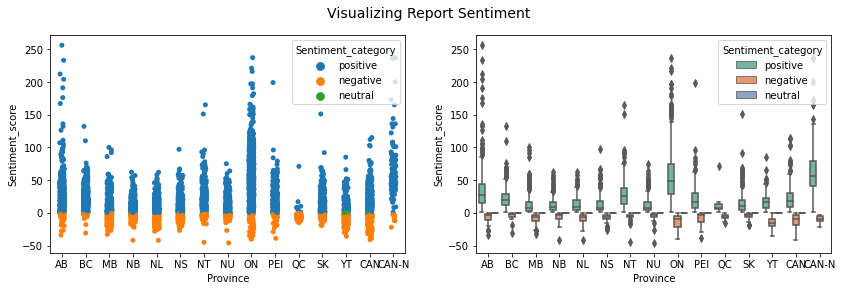

In [70]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='Province', y="Sentiment_score", 
                   hue='Sentiment_category', data=df, ax=ax1)
bp = sns.boxplot(x='Province', y="Sentiment_score", 
                 hue='Sentiment_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Report Sentiment', fontsize=14)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


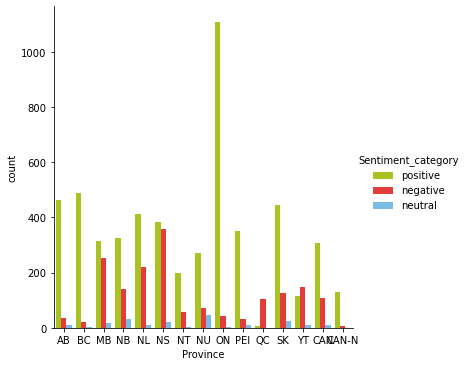

In [71]:
fc = sns.factorplot(x="Province", hue="Sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

It appears that for most provinces/territories, the majority of reports are positive. Ontario seems overwhelmingly positive compared to the number of negative or neutral reports and in comparison to other provinces/territories. Yukon and Quebec are the only province/territories to have more negative reports than positive reports. The eastern provinces New Brunswick, Newfoundland & Labrador and Nova Scotia seem to have a lower positive to negative reports ratio compared to many other areas. Manitoba also has a lower positive to negative report ratio than many others. 

Looking at the boxplots, Ontario again has more positive reports overall but it also has quite a few outliers. Alberta has many outliers as well.

## Case Counts

In [72]:
df_cases.head()

Unnamed: 0 Province        date  numconf  numprob  numdeaths  numtotal  \
0           0       ON  2020-01-31        3      0.0        0.0         3   
1           1       BC  2020-01-31        1      0.0        0.0         1   
2           2      CAN  2020-01-31        4      0.0        0.0         4   
3           3       ON  2020-02-08        3      0.0        0.0         3   
4           4       BC  2020-02-08        4      0.0        0.0         4   

   ratetests  numtoday  percentoday  ...  numdeaths_last14  ratedeaths_last14  \
0        NaN         3        300.0  ...               NaN                NaN   
1        NaN         1        100.0  ...               NaN                NaN   
2        NaN         4        400.0  ...               NaN                NaN   
3        NaN         0          0.0  ...               NaN                NaN   
4       12.0         3        300.0  ...               NaN                NaN   

   numtotal_last7  ratetotal_last7  numdeaths_last7  ratedeaths_last7  \
0             NaN              NaN              NaN               NaN   
1             NaN              NaN              NaN               NaN   
2             NaN              NaN              NaN               NaN   
3             NaN              NaN              NaN               NaN   
4             NaN              NaN              NaN               NaN   

   avgtotal_last7  avgincidence_last7  avgdeaths_last7  avgratedeaths_last7  
0             NaN                 NaN              NaN                  NaN  
1             NaN                 NaN              NaN                  NaN  
2             NaN                 NaN              NaN                  NaN  
3             NaN                 NaN              NaN                  NaN  
4             NaN                 NaN              NaN                  NaN  

[5 rows x 29 columns]

In [73]:
df_cases.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
df_cases = df_cases.rename(columns={'date': 'Date'})

In [74]:
df_cases.describe().T

count           mean            std  min       25%  \
numconf              7743.0   88215.845280  230966.073475  0.0    165.00   
numprob              5895.0       1.113486      17.173801  0.0      0.00   
numdeaths            7743.0    2163.825391    4965.498530  0.0      1.00   
numtotal             7743.0   88216.186620  230965.996270  0.0    165.00   
ratetests            7670.0  349705.579531  330380.796796  2.0  70874.50   
numtoday             7743.0     397.284386    1060.420702  0.0      0.00   
percentoday          7743.0       2.185695      13.720065  0.0      0.00   
ratetotal            7743.0     966.862580    1398.702069  0.0     50.30   
ratedeaths           7743.0      19.540953      29.866692  0.0      0.19   
numdeathstoday       7743.0       7.017952      20.999965 -7.0      0.00   
percentdeath         7465.0       2.022754       2.152061  0.0      0.58   
percentactive        7465.0      15.235411      25.359484  0.0      1.32   
numactive            7465.0    4907.918017   11896.920826  0.0      6.00   
rateactive           7743.0      58.652017      96.174769  0.0      1.72   
numtotal_last14      7504.0    5643.602745   14785.615457  0.0      5.00   
ratetotal_last14     7504.0      67.661987     104.613844  0.0      2.38   
numdeaths_last14     7504.0     100.753731     281.067209  0.0      0.00   
ratedeaths_last14    7504.0       1.014628       2.019005  0.0      0.00   
numtotal_last7       7504.0    2845.300373    7443.197056  0.0      2.00   
ratetotal_last7      7504.0      34.235085      53.767688  0.0      0.77   
numdeaths_last7      7504.0      50.489339     141.822260  0.0      0.00   
ratedeaths_last7     7503.0       0.509331       1.049673  0.0      0.00   
avgtotal_last7       7504.0     406.459622    1063.319572  0.0      0.00   
avgincidence_last7   7504.0       4.890820       7.681114  0.0      0.11   
avgdeaths_last7      7504.0       7.196695      20.269067  0.0      0.00   
avgratedeaths_last7  7504.0       0.072643       0.149926  0.0      0.00   

                           50%         75%         max  
numconf                1450.00   53846.500  1538093.00  
numprob                   0.00       0.000      833.00  
numdeaths                38.00    1385.000    27170.00  
numtotal               1450.00   53846.500  1538093.00  
ratetests            229284.00  545252.000  1290753.00  
numtoday                  7.00     271.000     9570.00  
percentoday               0.25       0.980      600.00  
ratetotal               199.75    1512.445     6016.38  
ratedeaths                4.19      29.350      131.80  
numdeathstoday            0.00       3.000      222.00  
percentdeath              1.39       2.480        9.99  
percentactive             5.39      14.140      100.00  
numactive               148.00    3810.000    89884.00  
rateactive               12.83      80.695      671.37  
numtotal_last14         148.00    3948.000   119808.00  
ratetotal_last14         15.50      98.370      612.55  
numdeaths_last14          2.00      48.000     2311.00  
ratedeaths_last14         0.16       1.120       17.40  
numtotal_last7           75.00    2019.250    61113.00  
ratetotal_last7           7.90      48.940      438.43  
numdeaths_last7           1.00      24.000     1236.00  
ratedeaths_last7          0.07       0.540        9.00  
avgtotal_last7           11.00     288.250     8730.00  
avgincidence_last7        1.13       6.990       62.63  
avgdeaths_last7           0.00       3.000      177.00  
avgratedeaths_last7       0.01       0.080        1.29

In [75]:
df_cases[['numtotal', 'numdeathstoday', 'avgtotal_last7', 'avgdeaths_last7', 'Province']].groupby('Province').describe().T

Province                          AB             BC           CAN  \
numtotal        count     551.000000     565.000000  5.650000e+02   
                mean    97278.566243   58640.646018  6.044822e+05   
                std     91762.783894   60145.473597  5.471407e+05   
                min         1.000000       1.000000  4.000000e+00   
                25%     10086.000000    3128.000000  1.084860e+05   
                50%     73488.000000   34728.000000  3.897750e+05   
                75%    182553.500000  122757.000000  1.155842e+06   
                max    266037.000000  173158.000000  1.538093e+06   
numdeathstoday  count     551.000000     565.000000  5.650000e+02   
                mean        4.435572       3.284956  4.808850e+01   
                std         7.165760       5.276927  4.963851e+01   
                min        -7.000000      -2.000000  0.000000e+00   
                25%         0.000000       0.000000  9.000000e+00   
                50%         2.000000       1.000000  3.100000e+01   
                75%         6.000000       4.000000  6.800000e+01   
                max        96.000000      45.000000  2.220000e+02   
avgtotal_last7  count     536.000000     536.000000  5.360000e+02   
                mean      488.509328     318.389925  2.845312e+03   
                std       523.594682     298.873785  2.471234e+03   
                min        17.000000       8.000000  2.730000e+02   
                25%        89.000000      46.000000  6.607500e+02   
                50%       261.500000     187.000000  1.983500e+03   
                75%       748.250000     544.000000  4.518500e+03   
                max      2058.000000    1130.000000  8.730000e+03   
avgdeaths_last7 count     536.000000     536.000000  5.360000e+02   
                mean        4.507463       3.408582  5.049254e+01   
                std         5.588033       4.010622  4.645062e+01   
                min         0.000000       0.000000  3.000000e+00   
                25%         1.000000       1.000000  1.300000e+01   
                50%         3.000000       2.000000  3.300000e+01   
                75%         5.000000       4.000000  7.600000e+01   
                max        34.000000      19.000000  1.770000e+02   

Province                         MB           NB           NL           NS  \
numtotal        count    549.000000   549.000000   549.000000   549.000000   
                mean   22225.914390   995.298725   645.411658  2245.744991   
                std    21878.365169   921.437083   483.968198  1942.288203   
                min        0.000000     0.000000     0.000000     0.000000   
                25%      394.000000   170.000000   266.000000  1067.000000   
                50%    19947.000000   546.000000   354.000000  1393.000000   
                75%    37807.000000  1858.000000  1062.000000  2119.000000   
                max    59203.000000  2909.000000  1532.000000  6117.000000   
numdeathstoday  count    549.000000   549.000000   549.000000   549.000000   
                mean       2.185792     0.085610     0.012750     0.171220   
                std        3.672011     0.304996     0.112298     0.642056   
                min       -1.000000     0.000000     0.000000     0.000000   
                25%        0.000000     0.000000     0.000000     0.000000   
                50%        1.000000     0.000000     0.000000     0.000000   
                75%        3.000000     0.000000     0.000000     0.000000   
                max       28.000000     2.000000     1.000000     6.000000   
avgtotal_last7  count    536.000000   536.000000   536.000000   536.000000   
                mean     110.065299     5.289179     2.766791    11.285448   
                std      126.860058     6.055534     6.050542    26.916740   
                min        0.000000     0.000000     0.000000     0.000000   
                25%       15.000000     1.000000     0.000000     1.000000   
      

## Vaccination Rates

In [76]:
df_vaccinations.head()

Unnamed: 0    week_end Province  numtotal_atleast1dose  numtotal_partially  \
0           0  2020-12-19      CAN                  12362             12362.0   
1           1  2020-12-19       NL                    972               972.0   
2           2  2020-12-19       NS                   1092              1092.0   
3           3  2020-12-19       QC                   4728              4728.0   
4           4  2020-12-19       MB                    894               894.0   

   numtotal_fully  proptotal_atleast1dose  proptotal_partially  \
0             0.0                    0.07                 0.07   
1             0.0                    0.19                 0.19   
2             0.0                    0.11                 0.11   
3             0.0                    0.06                 0.06   
4             0.0                    0.06                 0.06   

   proptotal_fully  numeligible_atleast1dose  numeligible_partially  \
0              0.0                       NaN                    NaN   
1              0.0                       NaN                    NaN   
2              0.0                       NaN                    NaN   
3              0.0                       NaN                    NaN   
4              0.0                       NaN                    NaN   

   numeligible_fully  propeligible_atleast1dose  propeligible_partially  \
0                NaN                        NaN                     NaN   
1                NaN                        NaN                     NaN   
2                NaN                        NaN                     NaN   
3                NaN                        NaN                     NaN   
4                NaN                        NaN                     NaN   

   propeligible_fully  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [77]:
df_vaccinations.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [78]:
df_vaccinations = df_vaccinations.rename(columns={'week_end': 'Date'})

In [79]:
df_vaccinations.describe().T

count          mean           std       min  \
numtotal_atleast1dose      469.0  1.687065e+06  4.433275e+06      0.00   
numtotal_partially         460.0  1.024510e+06  2.739336e+06      0.00   
numtotal_fully             455.0  6.933047e+05  2.551954e+06      0.00   
proptotal_atleast1dose     469.0  3.307288e+01  2.776701e+01      0.00   
proptotal_partially        460.0  1.626041e+01  1.641072e+01      0.00   
proptotal_fully            455.0  1.669004e+01  2.146693e+01      0.00   
numeligible_atleast1dose   140.0  3.670401e+06  6.738754e+06  17798.00   
numeligible_partially      131.0  1.718780e+06  3.551761e+06   2030.00   
numeligible_fully          140.0  2.030307e+06  4.298691e+06  14397.00   
propeligible_atleast1dose  140.0  7.754457e+01  5.676605e+00     60.99   
propeligible_partially     131.0  2.928557e+01  1.987271e+01      5.35   
propeligible_fully         140.0  4.669386e+01  2.282105e+01      3.09   

                                   25%         50%           75%          max  
numtotal_atleast1dose       21087.0000  124374.000  7.755000e+05  27148415.00  
numtotal_partially           5588.2500   85280.500  5.468880e+05  19962187.00  
numtotal_fully               8548.0000   27372.000  2.756410e+05  23516616.00  
proptotal_atleast1dose          3.3100      29.890  6.159000e+01        78.62  
proptotal_partially             2.0650      10.270  2.655000e+01        61.74  
proptotal_fully                 1.2850       3.930  3.169500e+01        70.97  
numeligible_atleast1dose   119000.7500  715161.500  3.605116e+06  27067464.00  
numeligible_partially       58312.5000  320872.000  1.586254e+06  19938084.00  
numeligible_fully           29750.5000  401907.000  1.842759e+06  23479456.00  
propeligible_atleast1dose      73.7100      77.995  8.153750e+01        89.26  
propeligible_partially         11.2050      21.810  4.838000e+01        69.41  
propeligible_fully             25.8375      53.165  6.647750e+01        82.42

In [80]:
df_vaccinations[['propeligible_fully', 'Province']].groupby('Province').describe()

propeligible_fully                                             \
                      count    mean        std    min      25%     50%   
Province                                                                 
AB                     10.0  44.962  19.462452  13.82  30.0100  49.870   
BC                     10.0  40.422  22.972080   6.90  21.9300  40.895   
CAN                    10.0  42.809  22.643079   9.18  24.3200  45.565   
MB                     10.0  47.615  23.267065  12.52  27.6025  53.890   
NB                     10.0  41.424  23.917836   6.79  21.2350  44.805   
NL                     10.0  30.161  21.975354   3.09  11.3225  27.885   
NS                     10.0  38.173  27.421387   5.11  11.9525  38.480   
NT                     10.0  68.301   4.150107  59.40  66.7225  68.475   
NU                     10.0  59.498   6.490057  51.55  54.2650  57.685   
ON                     10.0  44.106  23.864772   7.98  24.7250  47.965   
PEI                    10.0  33.029  19.515562  10.24  15.7250  30.320   
QC                     10.0  41.008  22.231877   9.53  22.8725  41.820   
SK                     10.0  46.453  19.326939  13.79  31.8100  52.735   
YT                     10.0  75.753   5.331489  67.67  71.4725  76.515   

                          
              75%    max  
Province                  
AB        61.8850  66.21  
BC        59.7600  70.87  
CAN       62.1550  70.72  
MB        66.1275  74.30  
NB        62.5475  69.63  
NL        47.6075  63.43  
NS        61.8350  74.56  
NT        70.8700  73.93  
NU        65.5025  68.56  
ON        64.8600  72.04  
PEI       47.5350  64.52  
QC        59.4850  70.83  
SK        62.2375  66.47  
YT        80.2250  82.42

## Join Reports & Case Data

In [81]:
df_covid = pd.merge(df_cases, df_vaccinations, how='outer', on=['Province', 'Date'])
df_covid.head(50)

Province        Date  numconf  numprob  numdeaths  numtotal  ratetests  \
0        ON  2020-01-31        3      0.0        0.0         3        NaN   
1        BC  2020-01-31        1      0.0        0.0         1        NaN   
2       CAN  2020-01-31        4      0.0        0.0         4        NaN   
3        ON  2020-02-08        3      0.0        0.0         3        NaN   
4        BC  2020-02-08        4      0.0        0.0         4       12.0   
5       CAN  2020-02-08        7      0.0        0.0         7        2.0   
6        ON  2020-02-16        3      0.0        0.0         3        NaN   
7        BC  2020-02-16        5      0.0        0.0         5       21.0   
8       CAN  2020-02-16        8      0.0        0.0         8        3.0   
9        ON  2020-02-21        3      0.0        0.0         3        NaN   
10       BC  2020-02-21        6      0.0        0.0         6       32.0   
11      CAN  2020-02-21        9      0.0        0.0         9        4.0   
12       ON  2020-02-24        4      0.0        0.0         4        NaN   
13       BC  2020-02-24        6      0.0        0.0         6       41.0   
14      CAN  2020-02-24       10      0.0        0.0        10        6.0   
15       ON  2020-02-25        4      0.0        0.0         4        NaN   
16       BC  2020-02-25        7      0.0        0.0         7       45.0   
17      CAN  2020-02-25       11      0.0        0.0        11        6.0   
18       ON  2020-02-26        5      0.0        0.0         5        NaN   
19       BC  2020-02-26        7      0.0        0.0         7       57.0   
20      CAN  2020-02-26       12      0.0        0.0        12        8.0   
21       ON  2020-02-27        6      0.0        0.0         6        NaN   
22       BC  2020-02-27        7      0.0        0.0         7       72.0   
23      CAN  2020-02-27       13      0.0        0.0        13       10.0   
24       ON  2020-02-29        8      0.0        0.0         8        NaN   
25       BC  2020-02-29        7      0.0        0.0         7       99.0   
26      CAN  2020-02-29       15      0.0        0.0        15       13.0   
27       ON  2020-03-01       15      0.0        0.0        15        NaN   
28       BC  2020-03-01        8      0.0        0.0         8      120.0   
29       QC  2020-03-01        1      0.0        0.0         1        2.0   
30      CAN  2020-03-01       24      0.0        0.0        24       17.0   
31       ON  2020-03-03       20      0.0        0.0        20        NaN   
32       BC  2020-03-03       12      0.0        0.0        12      134.0   
33       QC  2020-03-03        1      0.0        0.0         1        5.0   
34      CAN  2020-03-03       33      0.0        0.0        33       19.0   
35       ON  2020-03-05       22      0.0        0.0        22        NaN   
36       BC  2020-03-05       21      0.0        0.0        21      203.0   
37       QC  2020-03-05        2      0.0        0.0         2        6.0   
38      CAN  2020-03-05       45      0.0        0.0        45       29.0   
39       ON  2020-03-06       28      0.0        0.0        28        NaN   
40       BC  2020-03-06       21      0.0        0.0        21      255.0   
41       QC  2020-03-06        2      0.0        0.0         2       10.0   
42      CAN  2020-03-06       51      0.0        0.0        51       37.0   
43       ON  2020-03-07       28      0.0        0.0        28        NaN   
44       BC  2020-03-07       27      0.0        0.0        27      322.0   
45       QC  2020-03-07        2      0.0        0.0         2       13.0   
46      CAN  2020-03-07       57      0.0        0.0        57       46.0   
47       ON  2020-03-08       31      0.0        0.0        31        NaN   
48       BC  2020-03-08       27      0.0        1.0        27      481.0   
49       QC  2020-03-08        3      0.0        0.0         3       19.0   

    numtoday  percentoday  ratetotal  ...  numtotal_fully  \
0          3  

In [82]:
df_covid = pd.merge(df_covid, df_reports, how='outer', on=['Province', 'Date'])
df_covid.head(50).T

0   \
Province                           ON   
Date                       2020-01-31   
numconf                             3   
numprob                             0   
numdeaths                           0   
numtotal                            3   
ratetests                         NaN   
numtoday                            3   
percentoday                       300   
ratetotal                        0.02   
ratedeaths                          0   
numdeathstoday                      0   
percentdeath                        0   
percentactive                     100   
numactive                           3   
rateactive                       0.02   
numtotal_last14                   NaN   
ratetotal_last14                  NaN   
numdeaths_last14                  NaN   
ratedeaths_last14                 NaN   
numtotal_last7                    NaN   
ratetotal_last7                   NaN   
numdeaths_last7                   NaN   
ratedeaths_last7                  NaN   
avgtotal_last7                    NaN   
avgincidence_last7                NaN   
avgdeaths_last7                   NaN   
avgratedeaths_last7               NaN   
numtotal_atleast1dose             NaN   
numtotal_partially                NaN   
numtotal_fully                    NaN   
proptotal_atleast1dose            NaN   
proptotal_partially               NaN   
proptotal_fully                   NaN   
numeligible_atleast1dose          NaN   
numeligible_partially             NaN   
numeligible_fully                 NaN   
propeligible_atleast1dose         NaN   
propeligible_partially            NaN   
propeligible_fully                NaN   
Organization                      NaN   
Title                             NaN   
Body                              NaN   
Word_Count                        NaN   
Lemmatization                     NaN   
Stop                              NaN   

                                                                          1   \
Province                                                                  BC   
Date                                                              2020-01-31   
numconf                                                                    1   
numprob                                                                    0   
numdeaths                                                                  0   
numtotal                                                                   1   
ratetests                                                                NaN   
numtoday                                                                   1   
percentoday                                                              100   
ratetotal                                                               0.02   
ratedeaths                                                                 0   
numdeathstoday                                                             0   
percentdeath                                                               0   
percentactive                                                            100   
numactive                                                                  1   
rateactive                                                              0.02   
numtotal_last14                                                          NaN   
ratetotal_last14                                                         NaN   
numdeaths_last14                                                         NaN   
ratedeaths_last14                                                        NaN   
numtotal_last7                                                           NaN   
ratetotal_last7                                                          NaN   
numdeaths_last7                                                          NaN   
ratedeaths_last7                                                         NaN   
avgtotal_last7                                                           NaN   
avgincidence_last7         

In [83]:
df_covid.groupby('Province').describe()

numconf                                                          \
           count           mean            std  min        25%       50%   
Province                                                                   
AB         759.0   93166.629776   91004.664657  1.0    7506.00   64851.0   
BC         680.0   54765.011765   59134.016133  1.0    2632.00   22621.0   
CAN        620.0  606319.587097  545830.821930  4.0  108002.75  406067.5   
CAN-N        0.0            NaN            NaN  NaN        NaN       NaN   
MB         652.0   21173.930982   21649.781777  0.0     313.75   15875.0   
NB         609.0     919.333333     915.395057  0.0     165.00     379.0   
NL         731.0     589.759234     468.090618  0.0     261.00     311.0   
NS         810.0    2251.596296    1909.527337  0.0    1067.00    1439.0   
NT         649.0      48.699538      85.874158  0.0       5.00      15.0   
NU         786.0     225.984733     259.145725  0.0       0.00      65.0   
ON        1315.0  222692.288973  203044.290294  3.0   38910.00  144396.0   
PEI        680.0     101.311765      72.165494  0.0      35.75      84.0   
QC         558.0  189730.991039  140770.255561  1.0   57831.50  153958.0   
SK         648.0   19483.368827   19773.079726  0.0     968.00   11610.0   
YT         624.0     108.483974     185.029891  0.0      11.00      43.5   

                                numprob            ... propeligible_fully  \
                 75%        max   count      mean  ...                75%   
Province                                           ...                      
AB         173531.00   266037.0   589.0  0.000000  ...            61.8850   
BC         108593.50   173158.0   538.0  0.000000  ...            59.7600   
CAN       1166656.25  1538093.0   476.0  7.441176  ...            62.1550   
CAN-N            NaN        NaN     0.0       NaN  ...                NaN   
MB          36259.00    59203.0   505.0  4.720792  ...            66.1275   
NB           1736.00     2909.0   475.0  0.197895  ...            62.5475   
NL           1017.00     1532.0   584.0  0.445205  ...            47.6075   
NS           2342.50     6117.0   612.0  0.161765  ...            61.8350   
NT             43.00      563.0   512.0  0.000000  ...            70.8700   
NU            416.25      658.0   618.0  0.000000  ...            65.5025   
ON         398835.00   572978.0  1035.0  0.000000  ...            63.4600   
PEI           170.00      240.0   527.0  0.000000  ...            47.5350   
QC         345474.75   396034.0   424.0  2.872642  ...            59.4850   
SK          38652.00    57952.0   500.0  0.270000  ...            62.2375   
YT             77.00      699.0   482.0  0.000000  ...            80.2250   

                Word_Count                                               \
            max      count        mean         std    min    25%    50%   
Province                                                                  
AB        66.21      505.0  816.259406  492.943747   70.0  490.0  754.0   
BC        70.87      513.0  509.729045  178.388146  156.0  395.0  491.0   
CAN       70.72      425.0  665.160000  355.372231   88.0  381.0  616.0   
CAN-N       NaN      135.0  758.592593  261.310026  249.0  593.5  700.0   
MB        74.30      587.0  504.085179  198.870727   78.0  379.5  503.0   
NB        69.63      497.0  476.615694  288.289056   39.0  260.0  441.0   
NL        63.43      642.0  394.873832  240.797345   53.0  199.0  325.5   
NS        74.56      765.0  482.133333  167.411493   32.0  397.0  478.0   
NT        73.93      258.0  470.406977  312.729233   18.0  259.0  419.0   
NU        68.56      387.0  301.294574  278.372055   12.0   94.0  194.0   
ON        72.04     1157.0  666.385480  300.947615  145.0  449.0  627.0   
PEI       64.52      395.0  346.389873  180.355092   61.0  214.5  301.0   
QC        70.83      110.0  266.190909   67.019851  179.0  235.0  255.0   
SK        66.47      595.0  720.112605  353.666784  1

In [84]:
df_covid.loc[(df_covid.Province=='SK') & (df_covid.Date=='2021-04-06')]

Province        Date  numconf  numprob  numdeaths  numtotal  ratetests  \
7344       SK  2021-04-06  34982.0      0.0      443.0   34982.0   578979.0   
7345       SK  2021-04-06  34982.0      0.0      443.0   34982.0   578979.0   
7346       SK  2021-04-06  34982.0      0.0      443.0   34982.0   578979.0   

      numtoday  percentoday  ratetotal  ...  numeligible_fully  \
7344     219.0         0.63    2967.89  ...                NaN   
7345     219.0         0.63    2967.89  ...                NaN   
7346     219.0         0.63    2967.89  ...                NaN   

      propeligible_atleast1dose  propeligible_partially  propeligible_fully  \
7344                        NaN                     NaN                 NaN   
7345                        NaN                     NaN                 NaN   
7346                        NaN                     NaN                 NaN   

      Organization                                              Title  \
7344      Province  Record Investments In Mental Health And Addict...   
7345      Province  Budget 2021-22 Continues To Build Upon Record ...   
7346      Province  COVID-19 Update for April 6: More than 225,000...   

                                                   Body  Word_Count  \
7344  The 2021-22 provincial budget will invest a re...       500.0   
7345  This year's record Health budget will ensure S...      1225.0   
7346  Vaccines Reported\n\nAn additional 5,938 doses...      1099.0   

                                          Lemmatization  \
7344  ['the 2021 - 22 provincial budget will invest ...   
7345  ['this year \'s record Health budget will ensu...   
7346  ['vaccine report \n\n an additional 5,938 dose...   

                                                   Stop  
7344  ['[ \' 2021 - 22 provincial budget invest reco...  
7345  ['[ \' year \\ \' record Health budget ensure ...  
7346  ['[ \' vaccine report \\n\\n additional 5,938 ...  

[3 rows x 46 columns]

### Save files

In [85]:
df_covid.to_csv(r'../Data/covid_messaging_cases.csv')